In [1]:
#Examples of analyzing a data set.The sample data starts from May 2022 to June 2023.
#The code includes bar graphs, pie charts, and line graphs for all sites, as well as various time frames such as monthly, daily, hourly, and minute-based data. 
#The goal is to examine the various behavioral patterns displayed by individuals in each format. 
#The research team only presented a partial graph analysis in the paper, but this code includes analyses from all of the graph formats mentioned. 
#This comprehensive code is intended to allow other researchers to use it on their own data in the future.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [3]:
main_df = pd.read_csv('total_2022_m05_to_2023_m06_client_wifi.csv',parse_dates=['timestamp'])
main_df

,timestamp,deviceid,siteid
0,2022-07-01 00:00:03,1,7
1,2022-07-01 00:00:03,2,9
2,2022-07-01 00:00:03,3,9
3,2022-07-01 00:00:03,4,9
4,2022-07-01 00:00:03,5,4
...,...,...,...
35003668,2023-06-30 23:59:03,15031,5
35003669,2023-06-30 23:59:03,2933,5
35003670,2023-06-30 23:59:04,3950,8
35003671,2023-06-30 23:59:04,16346,8


In [4]:
main_df.drop_duplicates(inplace=True)
main_df

,timestamp,deviceid,siteid
0,2022-07-01 00:00:03,1,7
1,2022-07-01 00:00:03,2,9
2,2022-07-01 00:00:03,3,9
3,2022-07-01 00:00:03,4,9
4,2022-07-01 00:00:03,5,4
...,...,...,...
35003668,2023-06-30 23:59:03,15031,5
35003669,2023-06-30 23:59:03,2933,5
35003670,2023-06-30 23:59:04,3950,8
35003671,2023-06-30 23:59:04,16346,8


In [ ]:
main_df.info()

In [5]:
site_info = pd.read_csv('access_point_locations.csv')
site_info

,siteid,sitename,latitude,longitude
0,1,Klong-soi-1 Bridge,17.965310,102.560150
1,2,Village Fund building,17.962985,102.566729
2,3,In front of Chang Phueak Temple,17.959747,102.578958
3,4,In front of Klang Temple,17.959126,102.584171
4,5,Sri Chiang Mai Community Health Park,17.958903,102.587340
5,6,Naga Courtyard,17.959001,102.588942
6,7,In front of Had Pathum Temple,17.959004,102.590499
7,8,Boeng Wiang Courtyard,17.958664,102.590896
8,9,In front of Fresh Market,17.956875,102.585087
9,10,Soi-19,17.958885,102.585845


In [ ]:
site_info.info()

In [6]:
main_df=pd.merge(main_df,site_info,on='siteid',how='left')
main_df

,timestamp,deviceid,siteid,sitename,latitude,longitude
0,2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,17.959004,102.590499
1,2022-07-01 00:00:03,2,9,In front of Fresh Market,17.956875,102.585087
2,2022-07-01 00:00:03,3,9,In front of Fresh Market,17.956875,102.585087
3,2022-07-01 00:00:03,4,9,In front of Fresh Market,17.956875,102.585087
4,2022-07-01 00:00:03,5,4,In front of Klang Temple,17.959126,102.584171
...,...,...,...,...,...,...
32794197,2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,17.958903,102.587340
32794198,2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,17.958903,102.587340
32794199,2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,17.958664,102.590896
32794200,2023-06-30 23:59:04,16346,8,Boeng Wiang Courtyard,17.958664,102.590896


In [7]:
df = main_df.drop(columns=['latitude','longitude'],axis=1)
df

,timestamp,deviceid,siteid,sitename
0,2022-07-01 00:00:03,1,7,In front of Had Pathum Temple
1,2022-07-01 00:00:03,2,9,In front of Fresh Market
2,2022-07-01 00:00:03,3,9,In front of Fresh Market
3,2022-07-01 00:00:03,4,9,In front of Fresh Market
4,2022-07-01 00:00:03,5,4,In front of Klang Temple
...,...,...,...,...
32794197,2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park
32794198,2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park
32794199,2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard
32794200,2023-06-30 23:59:04,16346,8,Boeng Wiang Courtyard


In [8]:
df['year']=df.timestamp.dt.year
df['month']=df.timestamp.dt.month
df['month_name']=df.timestamp.dt.month_name()
df['day_name']=df.timestamp.dt.day_name()
df['hrs']=df.timestamp.dt.hour
df['minutes']= df.timestamp.dt.minute

In [9]:
df['day_period']=df.hrs.map(lambda x: '00:00-02:59' if (x>=0 and x<3) 
                        else ('03:00-05:59' if(x>=3 and x<6) 
                        else ('06:00-08:59' if (x>=6 and x<9) 
                        else ('09:00-11:59' if(x>=9 and x<12) 
                        else ('12:00-14:59' if(x>=12 and x<15) 
                        else ('15:00-17:59' if(x>=15 and x<18) 
                        else ('18:00-20:59' if(x>=18 and x<21) 
                        else '21:00-23:59')))))))

In [10]:
df

,timestamp,deviceid,siteid,sitename,year,month,month_name,day_name,hrs,minutes,day_period
0,2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,2022,7,July,Friday,0,0,00:00-02:59
1,2022-07-01 00:00:03,2,9,In front of Fresh Market,2022,7,July,Friday,0,0,00:00-02:59
2,2022-07-01 00:00:03,3,9,In front of Fresh Market,2022,7,July,Friday,0,0,00:00-02:59
3,2022-07-01 00:00:03,4,9,In front of Fresh Market,2022,7,July,Friday,0,0,00:00-02:59
4,2022-07-01 00:00:03,5,4,In front of Klang Temple,2022,7,July,Friday,0,0,00:00-02:59
...,...,...,...,...,...,...,...,...,...,...,...
32794197,2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,2023,6,June,Friday,23,59,21:00-23:59
32794198,2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,2023,6,June,Friday,23,59,21:00-23:59
32794199,2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,2023,6,June,Friday,23,59,21:00-23:59
32794200,2023-06-30 23:59:04,16346,8,Boeng Wiang Courtyard,2023,6,June,Friday,23,59,21:00-23:59


Text(0.5, 0, 'Time')

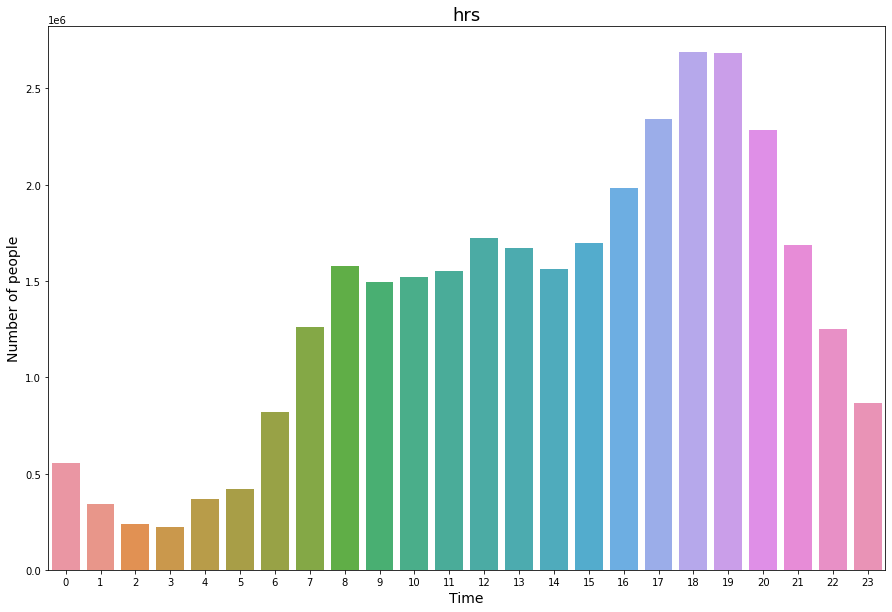

In [11]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(15, 10))
ax = sns.countplot(data=df,x='hrs')
ax.set_title('hrs',fontsize=18)
ax.set_ylabel('Number of people',fontsize=14)
ax.set_xlabel('Time',fontsize=14)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32794202 entries, 0 to 32794201
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   timestamp   datetime64[ns]
 1   deviceid    int64         
 2   siteid      int64         
 3   sitename    object        
 4   year        int64         
 5   month       int64         
 6   month_name  object        
 7   day_name    object        
 8   hrs         int64         
 9   minutes     int64         
 10  day_period  object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 2.9+ GB


In [13]:
groupby_site_uniqMac_total = pd.DataFrame(df.groupby(by=['sitename'])['deviceid'].value_counts().reset_index(name='counts'))
groupby_site_uniqMac_total

,sitename,deviceid,counts
0,Boeng Wiang Courtyard,21,27638
1,Boeng Wiang Courtyard,175,23136
2,Boeng Wiang Courtyard,980,19309
3,Boeng Wiang Courtyard,911,17075
4,Boeng Wiang Courtyard,141,16964
...,...,...,...
47862,Village Fund building,5785,1
47863,Village Fund building,5790,1
47864,Village Fund building,5832,1
47865,Village Fund building,5864,1


In [14]:
groupby_site_uniqMac_total.nunique()

sitename       11
deviceid    16741
counts       4439
dtype: int64

In [15]:
site_all_pieChart = groupby_site_uniqMac_total.groupby(by='sitename')['deviceid'].count().reset_index(name='qty')
site_all_pieChart

,sitename,qty
0,Boeng Wiang Courtyard,7519
1,In front of Chang Phueak Temple,2394
2,In front of Fresh Market,6870
3,In front of Had Pathum Temple,6912
4,In front of Klang Temple,5728
5,Klong-soi-1 Bridge,441
6,Naga Courtyard,7092
7,Soi-16,1316
8,Soi-19,1116
9,Sri Chiang Mai Community Health Park,7886


In [16]:
site_all_barChart = pd.DataFrame(groupby_site_uniqMac_total.groupby(by='sitename')['deviceid'].count().reset_index())                                                           
site_all_barChart['sitename'] = pd.Categorical(site_all_barChart['sitename'],
                                                   categories=['Klong-soi-1 Bridge','Village Fund building','In front of Chang Phueak  Temple','Soi-16',
                                                               'In front of Klang Temple','Soi-19','Sri Chiang Mai Community Health Park','Naga Courtyard',
                                                               'In front of Had Pathum Temple','Boeng Wiang Courtyard','In front of Fresh Market'])
site_all_barChart.sort_values(by='sitename',inplace=True)
site_all_barChart.set_index('sitename',inplace=True)
site_all_barChart

,deviceid
sitename,
Klong-soi-1 Bridge,441
Village Fund building,593
In front of Chang Phueak Temple,2394
Soi-16,1316
In front of Klang Temple,5728
Soi-19,1116
Sri Chiang Mai Community Health Park,7886
Naga Courtyard,7092
In front of Had Pathum Temple,6912


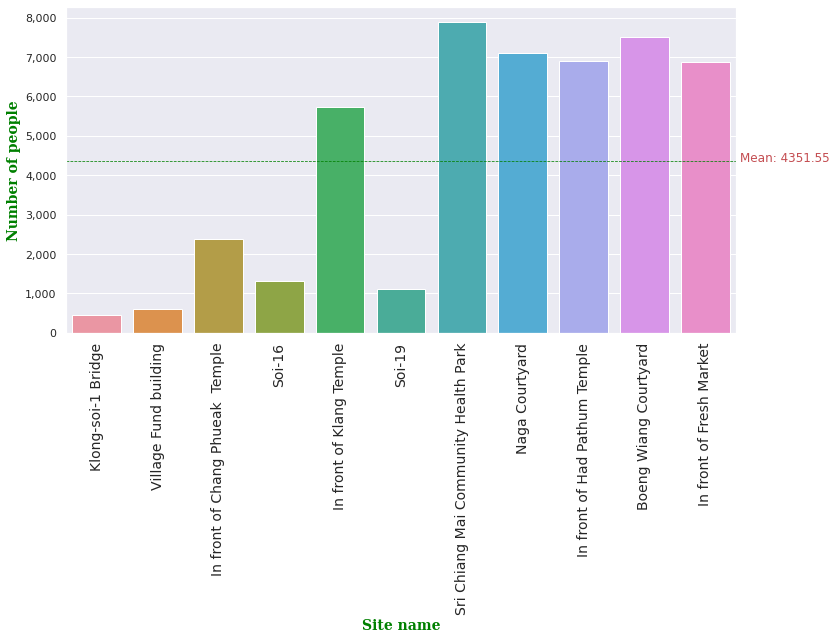

In [17]:
plt.figure(figsize=(12, 6))
mean_value = site_all_barChart['deviceid'].mean()
sns.set(style="darkgrid")
ax=sns.barplot(x=site_all_barChart.index, y='deviceid', data=site_all_barChart)
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
plt.axhline(site_all_barChart['deviceid'].mean(), color='green', linestyle='--',linewidth=0.75)
plt.text(len(site_all_barChart)+0.3, mean_value, f'Mean: {mean_value:.2f}', color ='r', ha='center')
xlabel_font = {'family': 'serif', 'color':  'green', 'weight': 'bold', 'size': 14}
plt.xlabel('Site name', fontdict=xlabel_font)
ylabel_font = {'family': 'serif', 'color':  'green', 'weight': 'bold', 'size': 14}
plt.ylabel('Number of people',fontdict=ylabel_font)
plt.xticks(rotation=90,fontsize=14)
plt.savefig('by_site_total.jpg');

In [18]:
site_all_pieChart.qty.sum()

47867

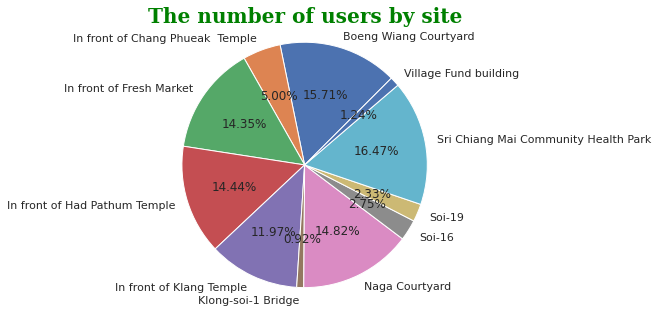

In [19]:
plt.figure(figsize=(10, 5))
plt.pie(site_all_pieChart['qty'], labels=site_all_pieChart['sitename'], autopct='%1.2f%%', startangle=45, explode=[0,0,0,0,0,0,0,0,0,0,0])
plt.axis('equal')
plt.title('The number of users by site',fontsize=20,weight='bold',family='serif',color='green')
plt.savefig('total_by_site.jpg')
plt.show()

In [20]:
groupby_site_month_uniqMac = pd.DataFrame(df.groupby(by=['sitename','year','month','month_name'])['deviceid'].value_counts().reset_index(name='counts'))
groupby_site_month_uniqMac

,sitename,year,month,month_name,deviceid,counts
0,Boeng Wiang Courtyard,2022,5,May,6039,1792
1,Boeng Wiang Courtyard,2022,5,May,21,914
2,Boeng Wiang Courtyard,2022,5,May,432,679
3,Boeng Wiang Courtyard,2022,5,May,62,590
4,Boeng Wiang Courtyard,2022,5,May,196,449
...,...,...,...,...,...,...
117702,Village Fund building,2022,12,December,8085,10
117703,Village Fund building,2022,12,December,8445,10
117704,Village Fund building,2022,12,December,805,9
117705,Village Fund building,2022,12,December,813,9


In [21]:
groupby_site_month_uniqMac.columns

Index(['sitename', 'year', 'month', 'month_name', 'deviceid', 'counts'], dtype='object')

In [22]:
groupby_site_month_uniqMac_pivot = pd.pivot_table(groupby_site_month_uniqMac,values='deviceid',index='sitename',columns=['year','month','month_name'],aggfunc='count')
groupby_site_month_uniqMac_pivot.fillna(0,inplace=True)
groupby_site_month_uniqMac_pivot

year                                    2022                                  \
month                                     5      6      7       8         9    
month_name                               May   June   July  August September   
sitename                                                                       
Boeng Wiang Courtyard                  710.0  187.0  133.0   523.0     868.0   
In front of Chang Phueak  Temple       635.0  409.0  488.0   514.0     578.0   
In front of Fresh Market              1260.0  766.0  939.0  1026.0    1327.0   
In front of Had Pathum Temple         1220.0  614.0  773.0   733.0    1085.0   
In front of Klang Temple               655.0  435.0  582.0   619.0     875.0   
Klong-soi-1 Bridge                      85.0   56.0   75.0    92.0      81.0   
Naga Courtyard                        1157.0  581.0  674.0   662.0     696.0   
Soi-16                                   0.0    0.0    6.0    17.0      15.0   
Soi-19                                   0.0    0.0    5.0    18.0      14.0   
Sri Chiang Mai Community Health Park  1080.0  582.0  781.0   747.0    1158.0   
Village Fund building                  136.0   64.0   90.0   141.0     169.0   

year                                                              2023  \
month                                     10       11       12      1    
month_name                           October November December January   
sitename                                                                 
Boeng Wiang Courtyard                 1613.0    962.0   1116.0  1033.0   
In front of Chang Phueak  Temple       658.0    573.0    415.0   416.0   
In front of Fresh Market              1422.0   1355.0   1549.0  1551.0   
In front of Had Pathum Temple         1689.0   1092.0   1310.0  1307.0   
In front of Klang Temple              1116.0   1006.0   1174.0  1144.0   
Klong-soi-1 Bridge                      97.0     93.0     92.0     0.0   
Naga Courtyard                        1419.0   1262.0   1485.0  1421.0   
Soi-16                                  21.0      0.0      4.0   536.0   
Soi-19                                  16.0      0.0      6.0   435.0   
Sri Chiang Mai Community Health Park  1473.0   1238.0   1432.0  1523.0   
Village Fund building                  139.0    103.0    102.0     0.0   

year                                                                           
month                                      2       3       4       5       6   
month_name                           February   March   April     May    June  
sitename                                                                       
Boeng Wiang Courtyard                  1565.0  1605.0  1732.0  1545.0  1278.0  
In front of Chang Phueak  Temple        518.0   539.0   459.0   485.0   452.0  
In front of Fresh Market               1583.0  1752.0  1907.0  1981.0  1930.0  
In front of Had Pathum Temple          1608.0  1482.0  1550.0  1462.0  1463.0  
In front of Klang Temple               1240.0  1376.0  1384.0  1525.0  1442.0  
Klong-soi-1 Bridge                        0.0     0.0     0.0     0.0     0.0  
Naga Courtyard                         1526.0  1520.0  1484.0  1547.0  1443.0  
Soi-16                                  499.0   527.0   511.0   531.0   504.0  
Soi-19                                  421.0   446.0   377.0   374.0   385.0  
Sri Chiang Mai Community Health Park   1647.0  1780.0  1849.0  2029.0  1910.0  
Village Fund building                     0.0     0.0     0.0     0.0     0.0

In [23]:
groupby_site_month_uniqMac_pivot.columns

MultiIndex([(2022,  5,       'May'),
            (2022,  6,      'June'),
            (2022,  7,      'July'),
            (2022,  8,    'August'),
            (2022,  9, 'September'),
            (2022, 10,   'October'),
            (2022, 11,  'November'),
            (2022, 12,  'December'),
            (2023,  1,   'January'),
            (2023,  2,  'February'),
            (2023,  3,     'March'),
            (2023,  4,     'April'),
            (2023,  5,       'May'),
            (2023,  6,      'June')],
           names=['year', 'month', 'month_name'])

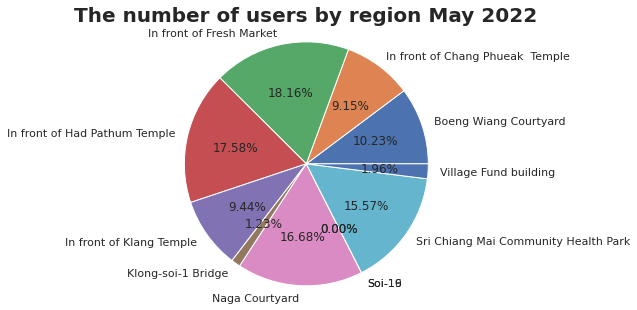

In [104]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2022,5,'May')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region May 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_may_2022.jpg')
plt.show()

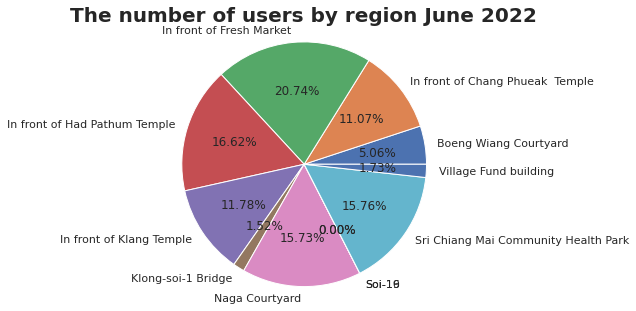

In [124]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2022,6,'June')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region June 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_jun_2022.jpg')
plt.show()

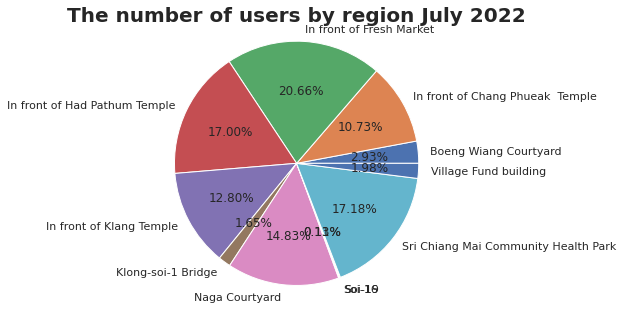

In [106]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2022,7,'July')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region July 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_jul_2022.jpg')
plt.show()

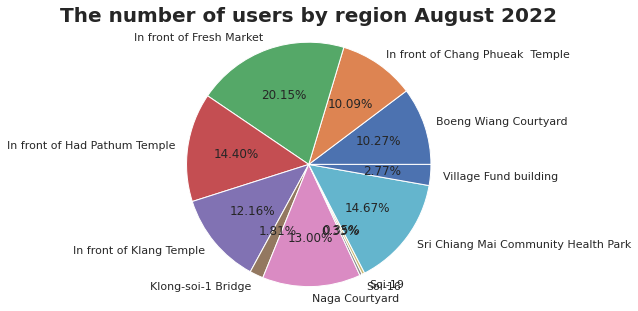

In [107]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2022,8,'August')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region August 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_aug_2022.jpg')
plt.show()

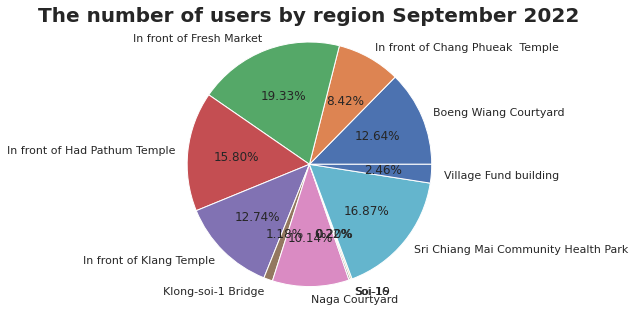

In [108]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2022,9,'September')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region September 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_sep_2022.jpg')
plt.show()

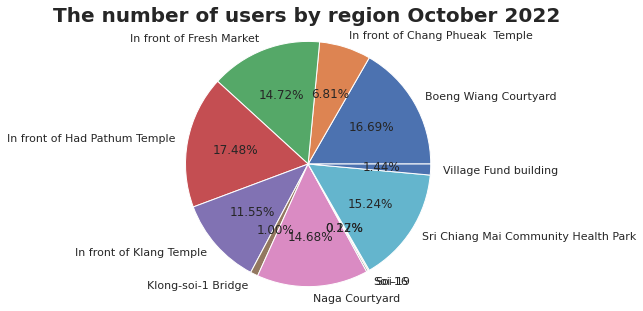

In [125]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2022,10,'October')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region October 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_oct_2022.jpg')
plt.show()

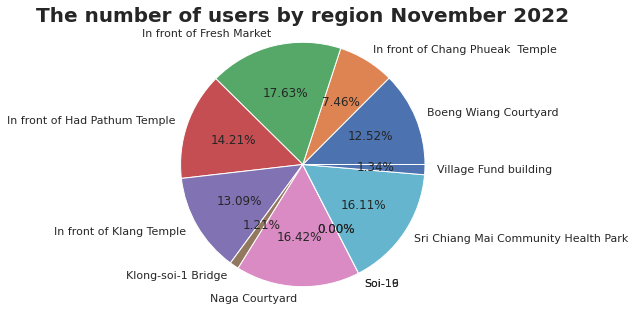

In [110]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2022,11,'November')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region November 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_nov_2022.jpg')
plt.show()

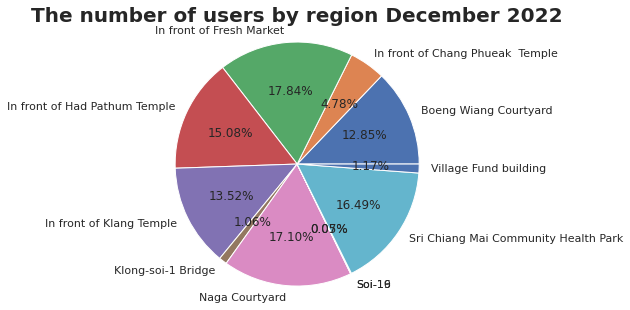

In [113]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2022,12,'December')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region December 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_dec_2022.jpg')
plt.show()

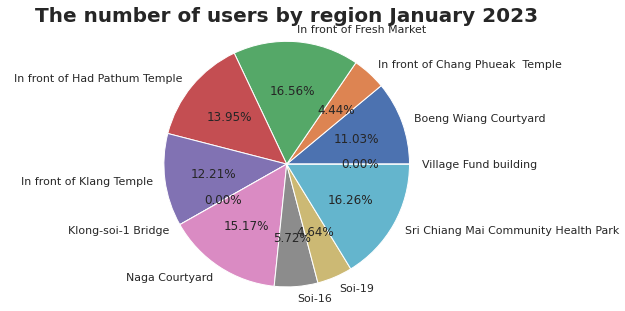

In [114]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2023,1,'January')],labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region January 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_jan_2023.jpg')
plt.show()

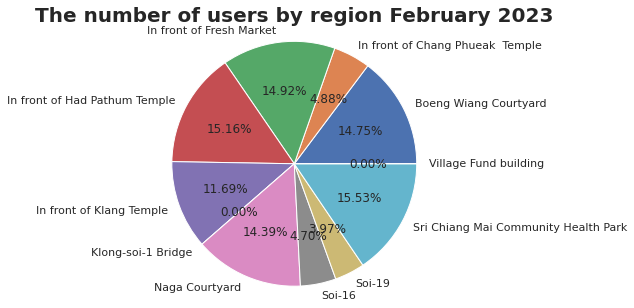

In [115]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2023,2,'February')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region February 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_feb_2023.jpg')
plt.show()

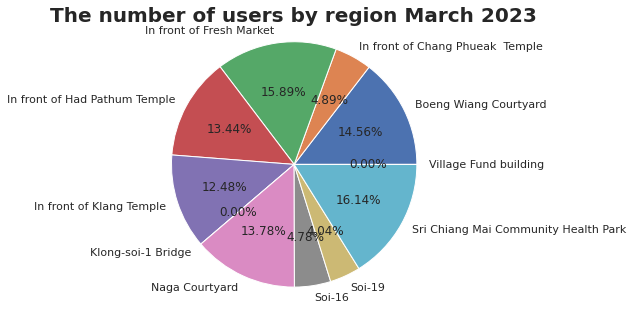

In [116]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2023,3,'March')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region March 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_mar_2023.jpg')
plt.show()

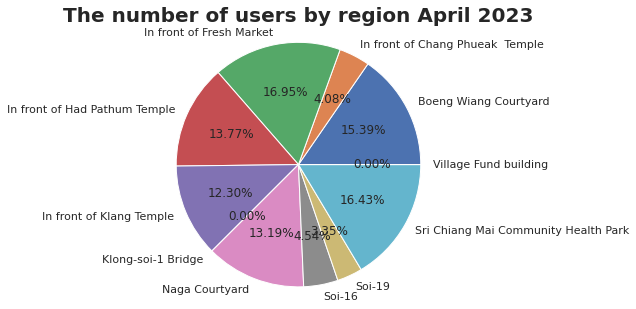

In [117]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2023,4,'April')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region April 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_apr_2023.jpg')
plt.show()

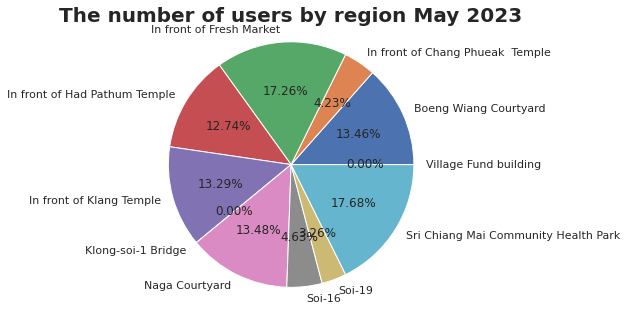

In [118]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2023,5,'May')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region May 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_may_2023.jpg')
plt.show()

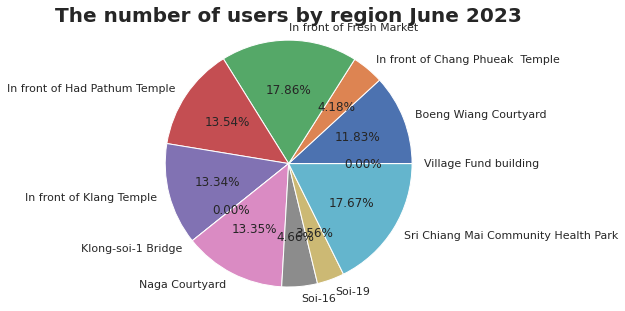

In [119]:
plt.figure(figsize=(10, 5))
plt.pie(groupby_site_month_uniqMac_pivot[(2023,6,'June')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region June 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_jun_2023.jpg')
plt.show()

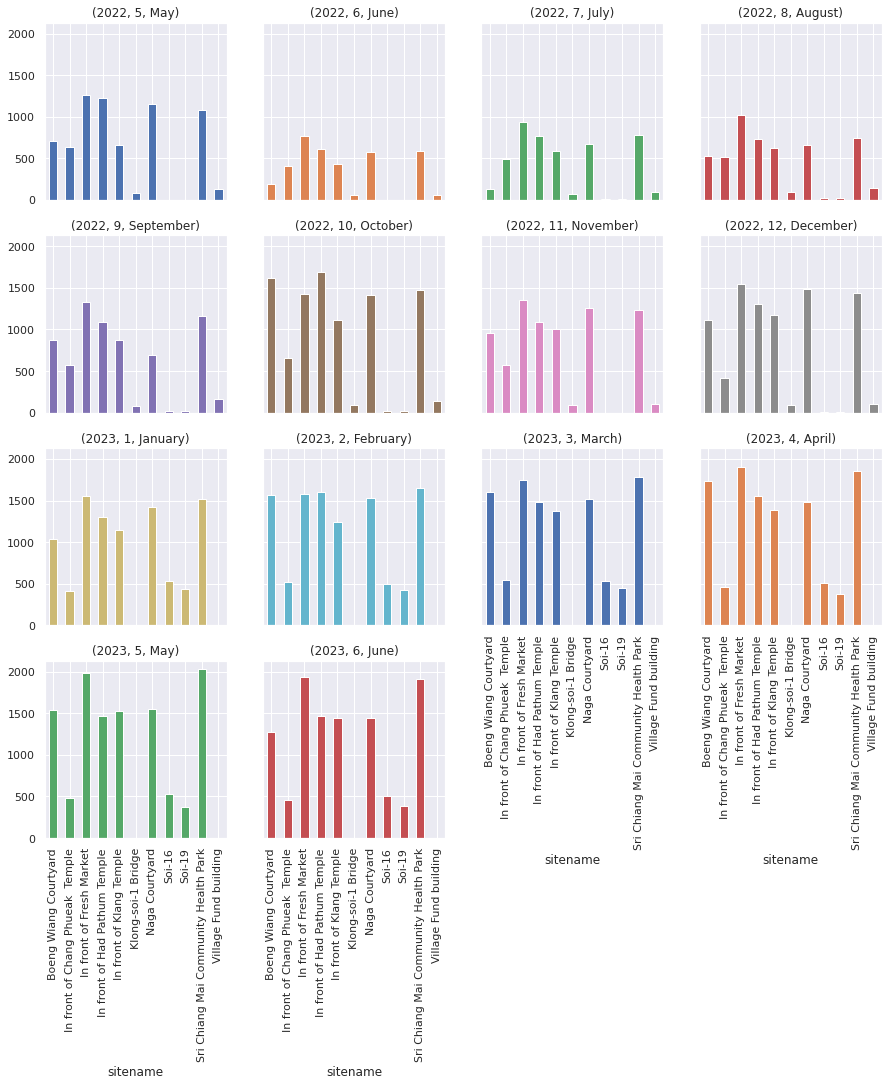

In [120]:
ax=groupby_site_month_uniqMac_pivot.plot(kind='bar',subplots=True, layout=(4, 4), figsize=(15,15),sharex=True,sharey=True,legend=False)
plt.savefig('by_site_sunplot.jpg');

In [25]:
groupby_year_month_uniqMac = pd.DataFrame(df.groupby(by=['year','month','month_name'])['deviceid'].value_counts().reset_index(name='counts'))
groupby_year_month_uniqMac

,year,month,month_name,deviceid,counts
0,2022,5,May,6039,7028
1,2022,5,May,62,5248
2,2022,5,May,92,4769
3,2022,5,May,39,4757
4,2022,5,May,432,4713
...,...,...,...,...,...
40412,2023,6,June,4153,6
40413,2023,6,June,16738,6
40414,2023,6,June,4397,5
40415,2023,6,June,16320,5


In [26]:
groupby_year_month_uniqMac['counts'].sum()

32794202

In [27]:
groupby_year_month_uniqMac.columns

Index(['year', 'month', 'month_name', 'deviceid', 'counts'], dtype='object')

In [28]:
del groupby_year_month_uniqMac['counts']

In [29]:
groupby_year_month_uniqMac.columns

Index(['year', 'month', 'month_name', 'deviceid'], dtype='object')

In [30]:
year_month_uniqMac = pd.DataFrame(groupby_year_month_uniqMac.groupby(by=['year','month','month_name'])['deviceid'].value_counts().reset_index(name='qty'))
year_month_uniqMac

,year,month,month_name,deviceid,qty
0,2022,5,May,1,1
1,2022,5,May,2,1
2,2022,5,May,3,1
3,2022,5,May,4,1
4,2022,5,May,5,1
...,...,...,...,...,...
40412,2023,6,June,16737,1
40413,2023,6,June,16738,1
40414,2023,6,June,16739,1
40415,2023,6,June,16740,1


In [31]:
for_chart = pd.DataFrame(year_month_uniqMac[['year','month','month_name']].value_counts().reset_index(name='qty'))
for_chart.sort_values(['year','month','month_name'],inplace=True)
for_chart['year'] = for_chart['year'].apply(str)
for_chart['month_year'] = for_chart['month_name']+' '+for_chart['year']
for_chart.set_index('month_year',inplace=True)
for_chart

,year,month,month_name,qty
month_year,,,,
May 2022,2022,5,May,2371
June 2022,2022,6,June,1223
July 2022,2022,7,July,1516
August 2022,2022,8,August,1532
September 2022,2022,9,September,2330
October 2022,2022,10,October,3507
November 2022,2022,11,November,2817
December 2022,2022,12,December,2958
January 2023,2023,1,January,3115


In [32]:
for_matplot_line=for_chart.drop(['year','month','month_name'],axis=1)

In [33]:
for_chart.index

Index(['May 2022', 'June 2022', 'July 2022', 'August 2022', 'September 2022',
       'October 2022', 'November 2022', 'December 2022', 'January 2023',
       'February 2023', 'March 2023', 'April 2023', 'May 2023', 'June 2023'],
      dtype='object', name='month_year')

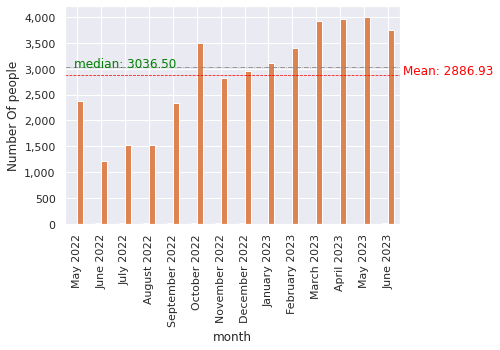

In [34]:
ax = for_chart.plot(kind='bar',legend=False)
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
mean_value = for_chart['qty'].mean()
median_value = for_chart['qty'].median()
plt.xticks(rotation=90)
plt.xlabel('month')
plt.ylabel('Number Of people')
plt.axhline(mean_value, color='red', linestyle='--',linewidth=0.75)
plt.axhline(median_value, color='gray', linestyle='-.',linewidth=0.75)
plt.savefig('by_month_bar.jpg')
plt.text(len(for_chart)+1.5, mean_value, f'Mean: {mean_value:.2f}', color='red', ha='center')
plt.text(len(for_chart)-12, median_value, f'median: {median_value:.2f}', color='green', ha='center');

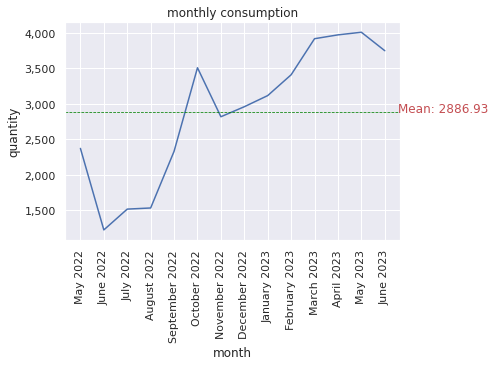

In [35]:
ax=sns.lineplot(x='month_year', y='qty', data=for_chart)#, estimator='mean'
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
mean_value = for_chart['qty'].mean()
plt.xticks(rotation=90)
plt.axhline(for_chart['qty'].mean(), color='green', linestyle='--',linewidth=0.75)
plt.xlabel('month')
plt.ylabel('quantity')
plt.title('monthly consumption')
plt.text(len(for_chart)+1.5, mean_value, f'Mean: {mean_value:.2f}', color='r', ha='center')
plt.savefig('by_month_line_sns.jpg');

In [36]:
site_month = pd.DataFrame(df.groupby(by=['sitename','year','month','month_name'])['deviceid'].value_counts().reset_index(name='qty'))
site_month

,sitename,year,month,month_name,deviceid,qty
0,Boeng Wiang Courtyard,2022,5,May,6039,1792
1,Boeng Wiang Courtyard,2022,5,May,21,914
2,Boeng Wiang Courtyard,2022,5,May,432,679
3,Boeng Wiang Courtyard,2022,5,May,62,590
4,Boeng Wiang Courtyard,2022,5,May,196,449
...,...,...,...,...,...,...
117702,Village Fund building,2022,12,December,8085,10
117703,Village Fund building,2022,12,December,8445,10
117704,Village Fund building,2022,12,December,805,9
117705,Village Fund building,2022,12,December,813,9


In [37]:
site_month_pivot = pd.pivot_table(site_month,values='deviceid',index=['year','month','month_name'],columns='sitename',aggfunc='count')
site_month_pivot

sitename               Boeng Wiang Courtyard  \
year month month_name                          
2022 5     May                         710.0   
     6     June                        187.0   
     7     July                        133.0   
     8     August                      523.0   
     9     September                   868.0   
     10    October                    1613.0   
     11    November                    962.0   
     12    December                   1116.0   
2023 1     January                    1033.0   
     2     February                   1565.0   
     3     March                      1605.0   
     4     April                      1732.0   
     5     May                        1545.0   
     6     June                       1278.0   

sitename               In front of Chang Phueak  Temple  \
year month month_name                                     
2022 5     May                                    635.0   
     6     June                                   409.0   
     7     July                                   488.0   
     8     August                                 514.0   
     9     September                              578.0   
     10    October                                658.0   
     11    November                               573.0   
     12    December                               415.0   
2023 1     January                                416.0   
     2     February                               518.0   
     3     March                                  539.0   
     4     April                                  459.0   
     5     May                                    485.0   
     6     June                                   452.0   

sitename               In front of Fresh Market  \
year month month_name                             
2022 5     May                           1260.0   
     6     June                           766.0   
     7     July                           939.0   
     8     August                        1026.0   
     9     September                     1327.0   
     10    October                       1422.0   
     11    November                      1355.0   
     12    December                      1549.0   
2023 1     January                       1551.0   
     2     February                      1583.0   
     3     March                         1752.0   
     4     April                         1907.0   
     5     May                           1981.0   
     6     June                          1930.0   

sitename               In front of Had Pathum Temple  \
year month month_name                                  
2022 5     May                                1220.0   
     6     June                                614.0   
     7     July                                773.0   
     8     August                              733.0   
     9     September                          1085.0   
     10    October                            1689.0   
     11    November                           1092.0   
     12    December                           1310.0   
2023 1     January                            1307.0   
     2     February                           1608.0   
     3     March                              1482.0   
     4     April                              1550.0   
     5     May                                1462.0   
     6     June                               1463.0   

sitename               In front of Klang Temple  Klong-soi-1 Bridge  \
year month month_name                                                 
2022 5     May                            655.0                85.0   
     6     June                           435.0                56.0   
     7     July                           582.0                75.0   
     8     August                         619.0                92.0   
     9     September                      875.0                81.0   
     10    October                       1116.0                97.0   
    

In [39]:
compare_site = site_month_pivot.reset_index()
compare_site

sitename,year,month,month_name,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
0,2022,5,May,710.0,635.0,1260.0,1220.0,655.0,85.0,1157.0,NaN,NaN,1080.0,136.0
1,2022,6,June,187.0,409.0,766.0,614.0,435.0,56.0,581.0,NaN,NaN,582.0,64.0
2,2022,7,July,133.0,488.0,939.0,773.0,582.0,75.0,674.0,6.0,5.0,781.0,90.0
3,2022,8,August,523.0,514.0,1026.0,733.0,619.0,92.0,662.0,17.0,18.0,747.0,141.0
4,2022,9,September,868.0,578.0,1327.0,1085.0,875.0,81.0,696.0,15.0,14.0,1158.0,169.0
5,2022,10,October,1613.0,658.0,1422.0,1689.0,1116.0,97.0,1419.0,21.0,16.0,1473.0,139.0
6,2022,11,November,962.0,573.0,1355.0,1092.0,1006.0,93.0,1262.0,NaN,NaN,1238.0,103.0
7,2022,12,December,1116.0,415.0,1549.0,1310.0,1174.0,92.0,1485.0,4.0,6.0,1432.0,102.0
8,2023,1,January,1033.0,416.0,1551.0,1307.0,1144.0,NaN,1421.0,536.0,435.0,1523.0,NaN
9,2023,2,February,1565.0,518.0,1583.0,1608.0,1240.0,NaN,1526.0,499.0,421.0,1647.0,NaN


In [40]:
compare_site['y_m_name'] = compare_site['month_name']+' '+compare_site['year'].astype(str)
compare_site.set_index('y_m_name',inplace=True)
compare_site

sitename,year,month,month_name,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
y_m_name,,,,,,,,,,,,,,
May 2022,2022,5,May,710.0,635.0,1260.0,1220.0,655.0,85.0,1157.0,NaN,NaN,1080.0,136.0
June 2022,2022,6,June,187.0,409.0,766.0,614.0,435.0,56.0,581.0,NaN,NaN,582.0,64.0
July 2022,2022,7,July,133.0,488.0,939.0,773.0,582.0,75.0,674.0,6.0,5.0,781.0,90.0
August 2022,2022,8,August,523.0,514.0,1026.0,733.0,619.0,92.0,662.0,17.0,18.0,747.0,141.0
September 2022,2022,9,September,868.0,578.0,1327.0,1085.0,875.0,81.0,696.0,15.0,14.0,1158.0,169.0
October 2022,2022,10,October,1613.0,658.0,1422.0,1689.0,1116.0,97.0,1419.0,21.0,16.0,1473.0,139.0
November 2022,2022,11,November,962.0,573.0,1355.0,1092.0,1006.0,93.0,1262.0,NaN,NaN,1238.0,103.0
December 2022,2022,12,December,1116.0,415.0,1549.0,1310.0,1174.0,92.0,1485.0,4.0,6.0,1432.0,102.0
January 2023,2023,1,January,1033.0,416.0,1551.0,1307.0,1144.0,NaN,1421.0,536.0,435.0,1523.0,NaN


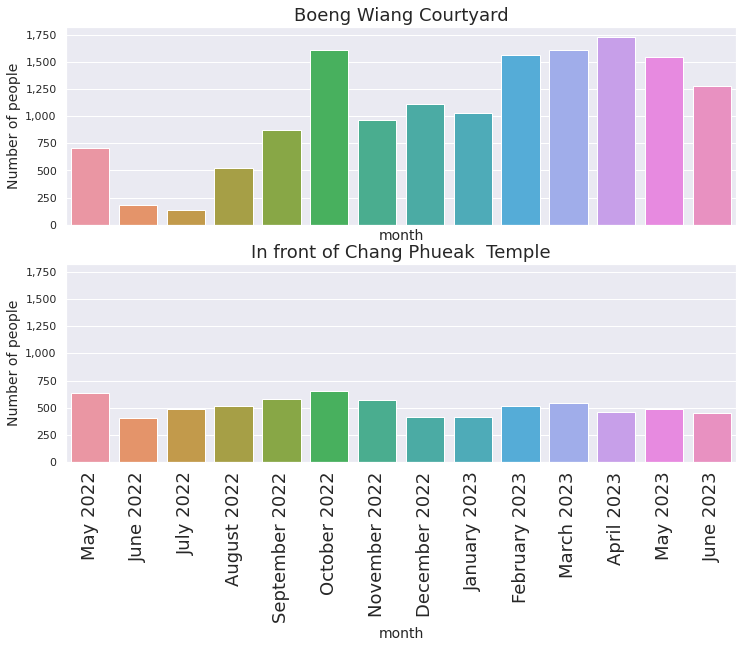

In [41]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(12, 8))
site_list = compare_site.columns
ax0 = sns.barplot(x=compare_site.index, y=compare_site[site_list[3]],data=compare_site,ax=ax[0])
ax[0].set_title(site_list[3],fontsize=18)
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
ax[0].set_ylabel('Number of people',fontsize=14)
ax[0].set_xlabel('month',fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90,fontsize=14)
ax1 = sns.barplot(x=compare_site.index, y=compare_site[site_list[4]],data=compare_site,ax=ax[1])
ax[1].set_title(site_list[4],fontsize=18)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
ax[1].set_ylabel('Number of people',fontsize=14)
ax[1].set_xlabel('month',fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,fontsize=18);

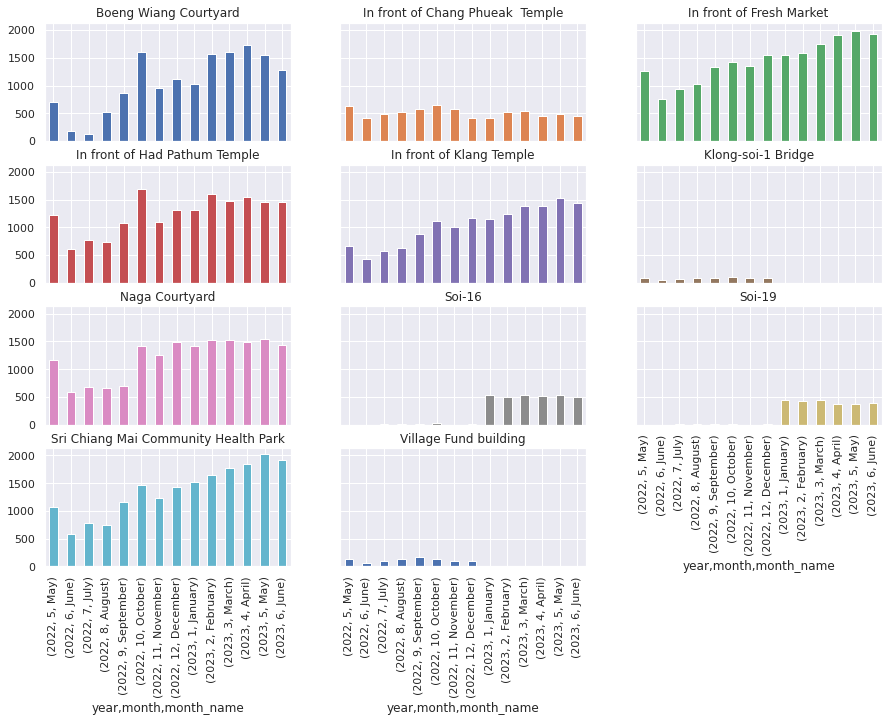

In [121]:
ax=site_month_pivot.plot(kind='bar',subplots=True, layout=(4, 3), figsize=(15,10),sharex=True,sharey=True,legend=False);

In [42]:
site_day = pd.DataFrame(df.groupby(by=['sitename','day_name'])['deviceid'].value_counts().reset_index(name='qty'))
site_day.drop('qty', axis=1,inplace=True)
site_day

,sitename,day_name,deviceid
0,Boeng Wiang Courtyard,Friday,1988
1,Boeng Wiang Courtyard,Friday,21
2,Boeng Wiang Courtyard,Friday,1558
3,Boeng Wiang Courtyard,Friday,175
4,Boeng Wiang Courtyard,Friday,980
...,...,...,...
140445,Village Fund building,Wednesday,145
140446,Village Fund building,Wednesday,851
140447,Village Fund building,Wednesday,808
140448,Village Fund building,Wednesday,546


In [43]:
site_day_all = pd.DataFrame(site_day.groupby(by=['day_name'])['deviceid'].value_counts().reset_index(name='freq'))
site_day_all

,day_name,deviceid,freq
0,Friday,9,11
1,Friday,52,11
2,Friday,204,11
3,Friday,217,11
4,Friday,239,11
...,...,...,...
46694,Wednesday,16663,1
46695,Wednesday,16665,1
46696,Wednesday,16666,1
46697,Wednesday,16667,1


In [44]:
site_day_all2 = pd.DataFrame(site_day_all.groupby(by=['day_name']).count()).drop('freq',axis=1).reset_index()
site_day_all2

,day_name,deviceid
0,Friday,6788
1,Monday,6442
2,Saturday,6723
3,Sunday,7636
4,Thursday,6406
5,Tuesday,6348
6,Wednesday,6356


In [45]:
site_day_all2['day_name'] = pd.Categorical(site_day_all2['day_name'],
                                                         categories=['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)
site_day_all2.sort_values(by='day_name',inplace=True)
site_day_all2

,day_name,deviceid
3,Sunday,7636
1,Monday,6442
5,Tuesday,6348
6,Wednesday,6356
4,Thursday,6406
0,Friday,6788
2,Saturday,6723


In [46]:
site_day_all2.set_index('day_name',inplace=True)
site_day_all2

,deviceid
day_name,
Sunday,7636
Monday,6442
Tuesday,6348
Wednesday,6356
Thursday,6406
Friday,6788
Saturday,6723


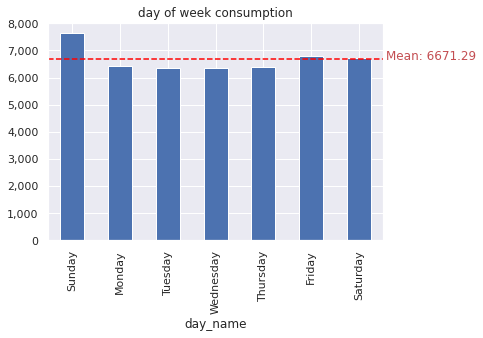

In [47]:
ax=site_day_all2.plot(kind='bar',legend=False,title='day of week consumption')
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
mean_value = site_day_all2['deviceid'].mean()
ax.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.text(len(site_day_all2)+0.5, mean_value, f'Mean: {mean_value:.2f}', color='r', ha='center')
plt.savefig('by_weekday_bar.jpg')
plt.show();

In [48]:
site_day_pivot = pd.pivot_table(site_day,values='deviceid',index=['day_name'],columns='sitename',aggfunc='count',sort=False).reset_index()
site_day_pivot

sitename,day_name,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
0,Friday,2713,1001,3507,3209,2547,133,3040,639,464,3421,174
1,Monday,2273,1028,3441,2775,2473,105,2771,606,467,3195,147
2,Saturday,2682,969,3407,3206,2500,153,3044,599,452,3238,192
3,Sunday,2644,1302,3981,3230,2605,156,3274,550,422,3638,246
4,Thursday,2486,995,3360,2875,2431,102,2819,633,494,3223,128
5,Tuesday,2392,1058,3335,2883,2416,107,2668,570,454,3128,143
6,Wednesday,2437,997,3304,2775,2350,98,2792,595,451,3202,130


In [49]:
site_day_pivot.columns

Index(['day_name', 'Boeng Wiang Courtyard', 'In front of Chang Phueak  Temple',
       'In front of Fresh Market', 'In front of Had Pathum Temple',
       'In front of Klang Temple', 'Klong-soi-1 Bridge', 'Naga Courtyard',
       'Soi-16', 'Soi-19', 'Sri Chiang Mai Community Health Park',
       'Village Fund building'],
      dtype='object', name='sitename')

In [50]:
site_day_pivot['day_name'] = pd.Categorical(site_day_pivot['day_name'],
                                                         categories=['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)
site_day_pivot.sort_values(by='day_name',inplace=True)
site_day_pivot.set_index('day_name',inplace=True)
site_day_pivot

sitename,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
day_name,,,,,,,,,,,
Sunday,2644,1302,3981,3230,2605,156,3274,550,422,3638,246
Monday,2273,1028,3441,2775,2473,105,2771,606,467,3195,147
Tuesday,2392,1058,3335,2883,2416,107,2668,570,454,3128,143
Wednesday,2437,997,3304,2775,2350,98,2792,595,451,3202,130
Thursday,2486,995,3360,2875,2431,102,2819,633,494,3223,128
Friday,2713,1001,3507,3209,2547,133,3040,639,464,3421,174
Saturday,2682,969,3407,3206,2500,153,3044,599,452,3238,192


In [51]:
site_day_pivot.index

CategoricalIndex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                  'Friday', 'Saturday'],
                 categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True, dtype='category', name='day_name')

In [ ]:
ax=site_day_pivot.plot(kind='bar',subplots=True, layout=(4, 3), figsize=(15,15),sharex=True,sharey=True,legend=False);
plt.savefig('by_weekday_site.jpg');

In [53]:
day_period_uniqMac = pd.DataFrame(df.groupby(by=['day_period'])['deviceid'].value_counts().reset_index(name='counts'))
day_period_uniqMac

,day_period,deviceid,counts
0,00:00-02:59,902,40481
1,00:00-02:59,901,36530
2,00:00-02:59,784,21326
3,00:00-02:59,255,18491
4,00:00-02:59,99,16519
...,...,...,...
48193,21:00-23:59,15533,1
48194,21:00-23:59,16045,1
48195,21:00-23:59,16439,1
48196,21:00-23:59,16682,1


In [54]:
day_period_total = pd.DataFrame(day_period_uniqMac.groupby('day_period').count()['deviceid'])
day_period_total

,deviceid
day_period,
00:00-02:59,2471
03:00-05:59,1470
06:00-08:59,4494
09:00-11:59,6148
12:00-14:59,7479
15:00-17:59,8355
18:00-20:59,10758
21:00-23:59,7023


In [55]:
day_period_total.deviceid.sum()

48198

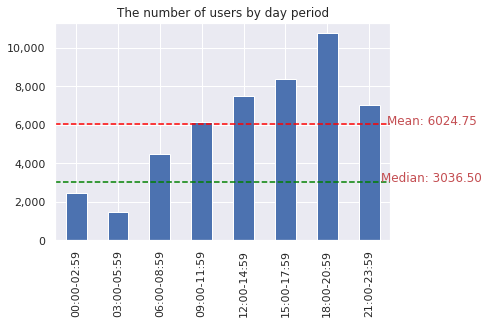

In [56]:
ax=day_period_total.plot(kind='bar',legend=False,xlabel='',title='The number of users by day period')
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
mean_value = day_period_total['deviceid'].mean()
median_vlue = day_period_total['deviceid'].median()
ax.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.text(len(day_period_total)+0.5, mean_value, f'Mean: {mean_value:.2f}', color='r', ha='center')
ax.axhline(median_value, color='green', linestyle='--', label='Median')
plt.text(len(day_period_total)+0.5, median_value, f'Median: {median_value:.2f}', color='r', ha='center')
plt.savefig('by_day.jpg')
plt.show();

In [57]:
day_period_uniqMac_site = pd.DataFrame(df.groupby(by=['day_period','sitename'])['deviceid'].value_counts().reset_index(name='counts'))
day_period_uniqMac_site

,day_period,sitename,deviceid,counts
0,00:00-02:59,Boeng Wiang Courtyard,1296,3150
1,00:00-02:59,Boeng Wiang Courtyard,784,3145
2,00:00-02:59,Boeng Wiang Courtyard,1988,2875
3,00:00-02:59,Boeng Wiang Courtyard,99,2348
4,00:00-02:59,Boeng Wiang Courtyard,1258,2290
...,...,...,...,...
137254,21:00-23:59,Village Fund building,6710,4
137255,21:00-23:59,Village Fund building,503,2
137256,21:00-23:59,Village Fund building,388,1
137257,21:00-23:59,Village Fund building,2716,1


In [58]:
day_period_uniqMac_site_pivot = pd.pivot_table(day_period_uniqMac_site,values='deviceid',index='day_period',columns=['sitename'],aggfunc='count')
day_period_uniqMac_site_pivot

sitename,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
day_period,,,,,,,,,,,
00:00-02:59,930,346,1013,1040,801,19,921,212,143,1025,78
03:00-05:59,269,150,825,334,366,8,340,98,77,436,19
06:00-08:59,1134,680,2794,1393,1379,72,1373,387,299,1810,67
09:00-11:59,2037,1071,3688,2476,2221,93,2341,581,432,2628,96
12:00-14:59,2650,1409,4257,3271,2683,139,3236,610,457,3296,182
15:00-17:59,3361,1376,4573,3845,3219,220,3798,697,575,4026,254
18:00-20:59,4734,1332,4088,4585,3785,191,4549,881,743,5443,322
21:00-23:59,2930,883,2502,3302,2368,74,3029,628,445,3619,190


In [59]:
day_period_uniqMac_site_pivot.sum(axis=1)

day_period
00:00-02:59     6528
03:00-05:59     2922
06:00-08:59    11388
09:00-11:59    17664
12:00-14:59    22190
15:00-17:59    25944
18:00-20:59    30653
21:00-23:59    19970
dtype: int64

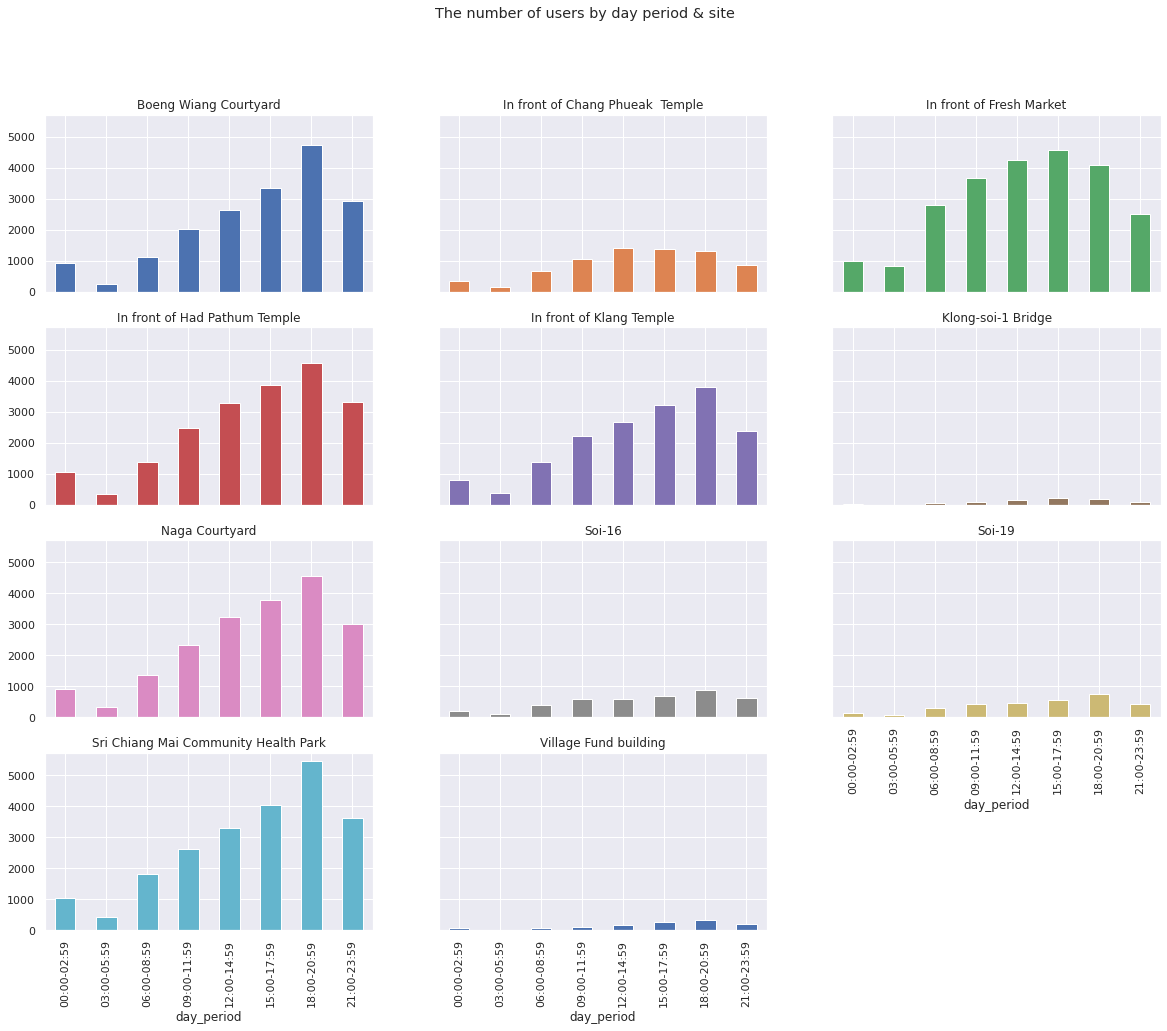

In [122]:
ax=day_period_uniqMac_site_pivot.plot(kind='bar',subplots=True, layout=(4, 3), figsize=(20,15),sharex=True,sharey=True,legend=False,title='The number of users by day period & site')
plt.savefig('by_day_period_site_subplt.jpg');

In [60]:
day_period_uniqMac_month = pd.DataFrame(df.groupby(by=['day_period','year','month','month_name'])['deviceid'].value_counts().reset_index(name='counts'))
day_period_uniqMac_month

,day_period,year,month,month_name,deviceid,counts
0,00:00-02:59,2022,5,May,6039,1224
1,00:00-02:59,2022,5,May,39,966
2,00:00-02:59,2022,5,May,432,663
3,00:00-02:59,2022,5,May,456,531
4,00:00-02:59,2022,5,May,5125,502
...,...,...,...,...,...,...
119129,21:00-23:59,2023,6,June,15111,1
119130,21:00-23:59,2023,6,June,16045,1
119131,21:00-23:59,2023,6,June,16439,1
119132,21:00-23:59,2023,6,June,16682,1


In [61]:
day_period_uniqMac_month_pivot = pd.pivot_table(day_period_uniqMac_month,values='deviceid',index='day_period',columns=['year','month','month_name'],aggfunc='count')
day_period_uniqMac_month_pivot

year         2022                                                        \
month          5    6     7      8         9       10       11       12   
month_name    May June  July August September October November December   
day_period                                                                
00:00-02:59   179  129   160    202       232     545      312      286   
03:00-05:59    53   82   104    131       173     270      222      233   
06:00-08:59   218  404   469    501       715     859      892      919   
09:00-11:59   315  538   668    741      1007    1323     1144     1227   
12:00-14:59  1489  590   714    781      1113    1589     1247     1388   
15:00-17:59  1441  676   848    897      1334    1780     1500     1614   
18:00-20:59   706  796  1020   1027      1483    2252     1757     1868   
21:00-23:59   583  457   542    588       764    1462     1030     1070   

year           2023                                   
month            1        2     3     4     5     6   
month_name  January February March April   May  June  
day_period                                            
00:00-02:59     384      493   445   534   517   401  
03:00-05:59     218      267   259   309   353   302  
06:00-08:59     969     1003  1176  1077  1254  1232  
09:00-11:59    1436     1460  1711  1602  1687  1629  
12:00-14:59    1571     1591  1771  1740  1807  1720  
15:00-17:59    1818     2010  2069  2055  2152  2018  
18:00-20:59    2045     2431  2661  2741  2813  2531  
21:00-23:59    1116     1516  1561  1741  1719  1560

In [62]:
day_period_uniqMac_month_pivot.sum(axis=1)

day_period
00:00-02:59     4819
03:00-05:59     2976
06:00-08:59    11688
09:00-11:59    16488
12:00-14:59    19111
15:00-17:59    22212
18:00-20:59    26131
21:00-23:59    15709
dtype: int64

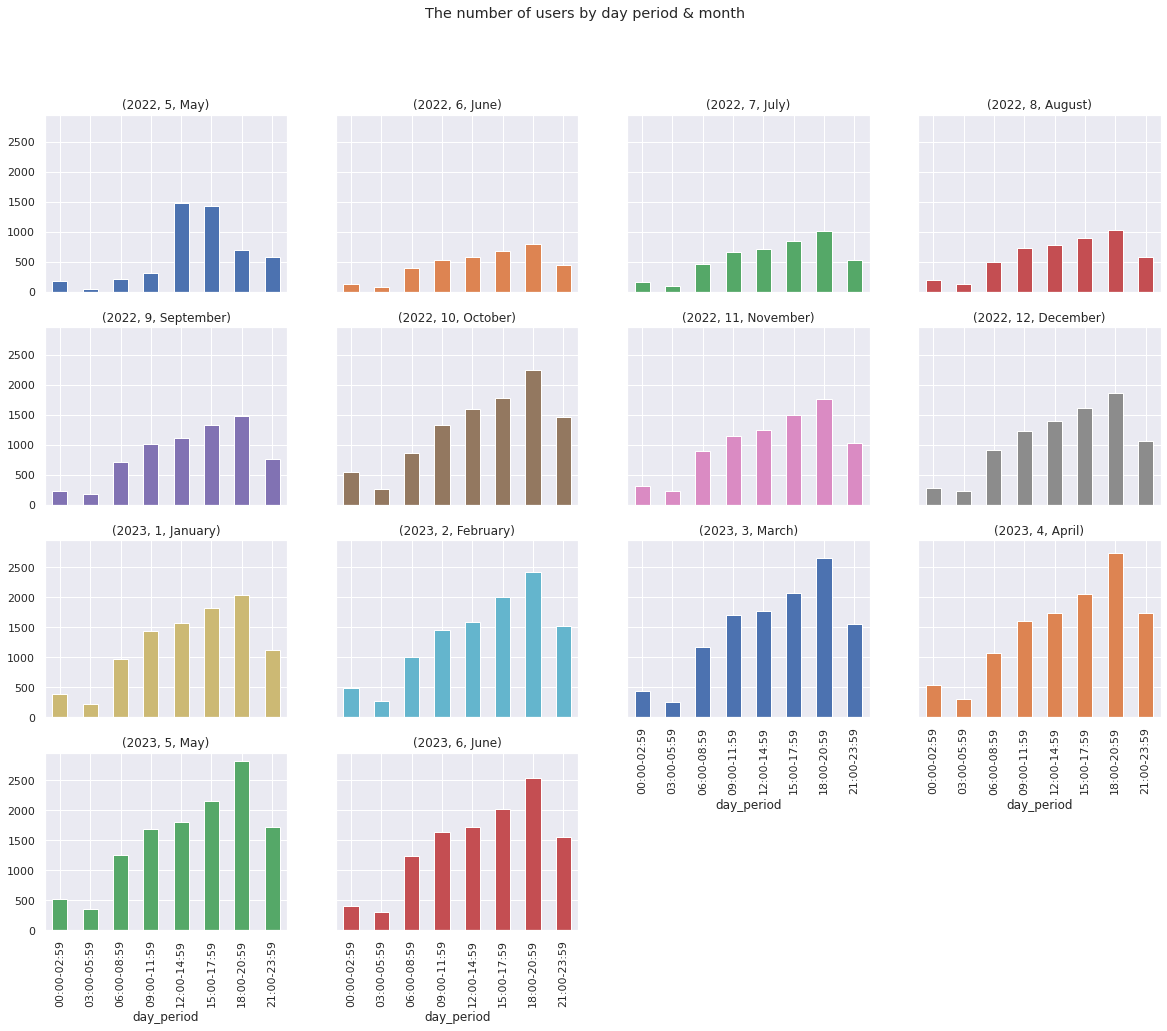

In [123]:
ax=day_period_uniqMac_month_pivot.plot(kind='bar',subplots=True, layout=(4, 4), figsize=(20,15),sharex=True,sharey=True,\
                                    legend=False,title='The number of users by day period & month')
plt.savefig('by_period_month_sub_plt.jpg');

# Date scale

In [63]:
df_date_scale = main_df.reset_index().drop('index',axis=1)
df_date_scale

,timestamp,deviceid,siteid,sitename,latitude,longitude
0,2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,17.959004,102.590499
1,2022-07-01 00:00:03,2,9,In front of Fresh Market,17.956875,102.585087
2,2022-07-01 00:00:03,3,9,In front of Fresh Market,17.956875,102.585087
3,2022-07-01 00:00:03,4,9,In front of Fresh Market,17.956875,102.585087
4,2022-07-01 00:00:03,5,4,In front of Klang Temple,17.959126,102.584171
...,...,...,...,...,...,...
32794197,2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,17.958903,102.587340
32794198,2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,17.958903,102.587340
32794199,2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,17.958664,102.590896
32794200,2023-06-30 23:59:04,16346,8,Boeng Wiang Courtyard,17.958664,102.590896


In [64]:
df_date_scale.columns

Index(['timestamp', 'deviceid', 'siteid', 'sitename', 'latitude', 'longitude'], dtype='object')

In [65]:
df_date_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32794202 entries, 0 to 32794201
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   deviceid   int64         
 2   siteid     int64         
 3   sitename   object        
 4   latitude   float64       
 5   longitude  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.5+ GB


In [66]:
df_date_scale['month_date'] = pd.to_datetime(df_date_scale['timestamp'].dt.date)
df_date_scale

,timestamp,deviceid,siteid,sitename,latitude,longitude,month_date
0,2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,17.959004,102.590499,2022-07-01
1,2022-07-01 00:00:03,2,9,In front of Fresh Market,17.956875,102.585087,2022-07-01
2,2022-07-01 00:00:03,3,9,In front of Fresh Market,17.956875,102.585087,2022-07-01
3,2022-07-01 00:00:03,4,9,In front of Fresh Market,17.956875,102.585087,2022-07-01
4,2022-07-01 00:00:03,5,4,In front of Klang Temple,17.959126,102.584171,2022-07-01
...,...,...,...,...,...,...,...
32794197,2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30
32794198,2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30
32794199,2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30
32794200,2023-06-30 23:59:04,16346,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30


In [67]:
df_date_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32794202 entries, 0 to 32794201
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   timestamp   datetime64[ns]
 1   deviceid    int64         
 2   siteid      int64         
 3   sitename    object        
 4   latitude    float64       
 5   longitude   float64       
 6   month_date  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.7+ GB


In [68]:
df_date_scale.set_index('timestamp',inplace=True)
df_date_scale

,deviceid,siteid,sitename,latitude,longitude,month_date
timestamp,,,,,,
2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,17.959004,102.590499,2022-07-01
2022-07-01 00:00:03,2,9,In front of Fresh Market,17.956875,102.585087,2022-07-01
2022-07-01 00:00:03,3,9,In front of Fresh Market,17.956875,102.585087,2022-07-01
2022-07-01 00:00:03,4,9,In front of Fresh Market,17.956875,102.585087,2022-07-01
2022-07-01 00:00:03,5,4,In front of Klang Temple,17.959126,102.584171,2022-07-01
...,...,...,...,...,...,...
2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30
2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30
2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30


In [69]:
ds_apr = df_date_scale.loc['2023-04']
ds_apr

,deviceid,siteid,sitename,latitude,longitude,month_date
timestamp,,,,,,
2023-04-01 00:00:02,239,3,In front of Chang Phueak Temple,17.959747,102.578958,2023-04-01
2023-04-01 00:00:02,3407,3,In front of Chang Phueak Temple,17.959747,102.578958,2023-04-01
2023-04-01 00:00:02,3407,11,Soi-16,17.959502,102.581291,2023-04-01
2023-04-01 00:00:02,239,11,Soi-16,17.959502,102.581291,2023-04-01
2023-04-01 00:00:03,441,11,Soi-16,17.959502,102.581291,2023-04-01
...,...,...,...,...,...,...
2023-04-30 23:59:04,2968,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-04-30
2023-04-30 23:59:04,3404,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-04-30
2023-04-30 23:59:04,3417,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-04-30


In [70]:
ds_apr_group = pd.DataFrame(ds_apr.groupby(by=['month_date','sitename'])['deviceid'].value_counts().reset_index(name='counts'))
ds_apr_group

,month_date,sitename,deviceid,counts
0,2023-04-01,Boeng Wiang Courtyard,3452,424
1,2023-04-01,Boeng Wiang Courtyard,3413,288
2,2023-04-01,Boeng Wiang Courtyard,2498,245
3,2023-04-01,Boeng Wiang Courtyard,3000,240
4,2023-04-01,Boeng Wiang Courtyard,1061,218
...,...,...,...,...
40400,2023-04-30,Sri Chiang Mai Community Health Park,2358,33
40401,2023-04-30,Sri Chiang Mai Community Health Park,2968,31
40402,2023-04-30,Sri Chiang Mai Community Health Park,2929,28
40403,2023-04-30,Sri Chiang Mai Community Health Park,2999,27


In [71]:
ds_apr_group_pivot = pd.pivot_table(ds_apr_group,values='deviceid',index=['month_date'],columns='sitename',aggfunc='count').fillna(0)
ds_apr_group_pivot

sitename,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park
month_date,,,,,,,,,
2023-04-01,164,58,358,230,207,186,63,38,289
2023-04-02,138,57,319,150,184,155,76,37,235
2023-04-03,131,65,367,169,176,160,90,45,244
2023-04-04,67,31,213,113,131,138,51,28,180
2023-04-05,149,60,368,208,200,186,74,33,258
2023-04-06,125,45,351,179,184,192,81,48,271
2023-04-07,148,47,363,206,205,191,87,45,273
2023-04-08,114,47,267,139,122,111,62,34,171
2023-04-12,239,41,250,296,181,287,80,42,305


In [72]:
ds_apr_group_pivot['str_date'] = ds_apr_group_pivot.index.strftime('%b-%d')
ds_apr_group_pivot

sitename,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,str_date
month_date,,,,,,,,,,
2023-04-01,164,58,358,230,207,186,63,38,289,Apr-01
2023-04-02,138,57,319,150,184,155,76,37,235,Apr-02
2023-04-03,131,65,367,169,176,160,90,45,244,Apr-03
2023-04-04,67,31,213,113,131,138,51,28,180,Apr-04
2023-04-05,149,60,368,208,200,186,74,33,258,Apr-05
2023-04-06,125,45,351,179,184,192,81,48,271,Apr-06
2023-04-07,148,47,363,206,205,191,87,45,273,Apr-07
2023-04-08,114,47,267,139,122,111,62,34,171,Apr-08
2023-04-12,239,41,250,296,181,287,80,42,305,Apr-12


In [73]:
ds_apr_group_pivot.columns

Index(['Boeng Wiang Courtyard', 'In front of Chang Phueak  Temple',
       'In front of Fresh Market', 'In front of Had Pathum Temple',
       'In front of Klang Temple', 'Naga Courtyard', 'Soi-16', 'Soi-19',
       'Sri Chiang Mai Community Health Park', 'str_date'],
      dtype='object', name='sitename')

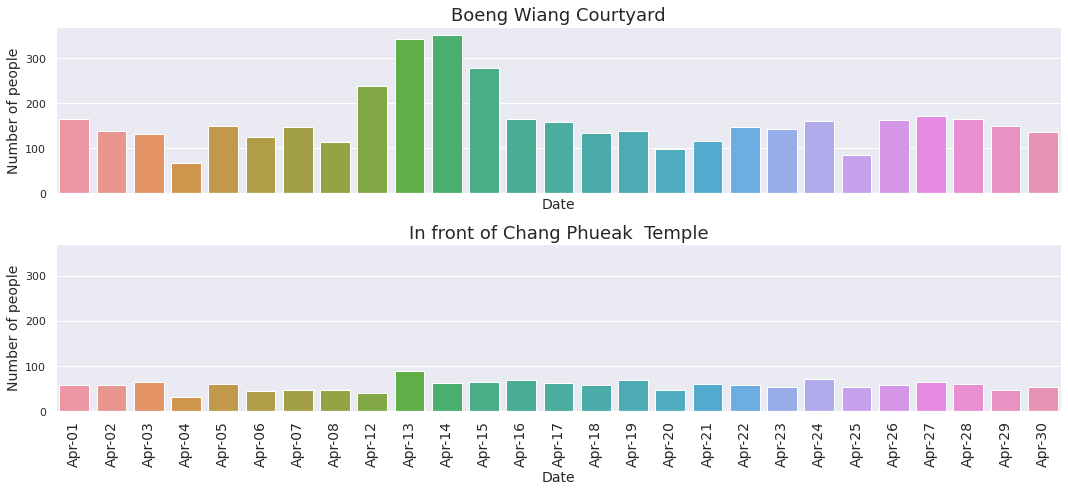

In [74]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15, 7))
site_list = ds_apr_group_pivot.columns
ax0 = sns.barplot(x=ds_apr_group_pivot.str_date, y=ds_apr_group_pivot[site_list[0]],data=ds_apr_group_pivot,ax=ax[0])
ax[0].set_title(site_list[0],fontsize=18)
ax[0].set_xlabel('Date',fontsize=14)
ax[0].set_ylabel('Number of people',fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90,fontsize=14)
ax1 = sns.barplot(x=ds_apr_group_pivot.str_date, y=ds_apr_group_pivot[site_list[1]],data=ds_apr_group_pivot,ax=ax[1])
ax[1].set_title(site_list[1],fontsize=18)
ax[1].set_xlabel('Date',fontsize=14)
ax[1].set_ylabel('Number of people',fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,fontsize=14)
plt.tight_layout();

# Hour scale

In [75]:
df_hour_scale = df_date_scale.reset_index()
df_hour_scale

,timestamp,deviceid,siteid,sitename,latitude,longitude,month_date
0,2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,17.959004,102.590499,2022-07-01
1,2022-07-01 00:00:03,2,9,In front of Fresh Market,17.956875,102.585087,2022-07-01
2,2022-07-01 00:00:03,3,9,In front of Fresh Market,17.956875,102.585087,2022-07-01
3,2022-07-01 00:00:03,4,9,In front of Fresh Market,17.956875,102.585087,2022-07-01
4,2022-07-01 00:00:03,5,4,In front of Klang Temple,17.959126,102.584171,2022-07-01
...,...,...,...,...,...,...,...
32794197,2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30
32794198,2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30
32794199,2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30
32794200,2023-06-30 23:59:04,16346,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30


In [76]:
df_hour_scale['hrs']=df_hour_scale.timestamp.dt.hour
df_hour_scale

,timestamp,deviceid,siteid,sitename,latitude,longitude,month_date,hrs
0,2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,17.959004,102.590499,2022-07-01,0
1,2022-07-01 00:00:03,2,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0
2,2022-07-01 00:00:03,3,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0
3,2022-07-01 00:00:03,4,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0
4,2022-07-01 00:00:03,5,4,In front of Klang Temple,17.959126,102.584171,2022-07-01,0
...,...,...,...,...,...,...,...,...
32794197,2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30,23
32794198,2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30,23
32794199,2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30,23
32794200,2023-06-30 23:59:04,16346,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30,23


In [77]:
df_hour_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32794202 entries, 0 to 32794201
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   timestamp   datetime64[ns]
 1   deviceid    int64         
 2   siteid      int64         
 3   sitename    object        
 4   latitude    float64       
 5   longitude   float64       
 6   month_date  datetime64[ns]
 7   hrs         int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 2.0+ GB


In [78]:
df2 = pd.DataFrame(df_hour_scale.groupby(by=['month_date','sitename','hrs'])['deviceid'].value_counts().reset_index(name='counts'))
df2

,month_date,sitename,hrs,deviceid,counts
0,2022-05-22,Boeng Wiang Courtyard,14,320,14
1,2022-05-22,Boeng Wiang Courtyard,14,21,13
2,2022-05-22,Boeng Wiang Courtyard,14,99,13
3,2022-05-22,Boeng Wiang Courtyard,14,432,11
4,2022-05-22,Boeng Wiang Courtyard,14,76,9
...,...,...,...,...,...
1171355,2023-06-30,Sri Chiang Mai Community Health Park,23,16740,17
1171356,2023-06-30,Sri Chiang Mai Community Health Park,23,4426,15
1171357,2023-06-30,Sri Chiang Mai Community Health Park,23,15843,13
1171358,2023-06-30,Sri Chiang Mai Community Health Park,23,2009,7


In [79]:
df3 = df2.drop(columns='counts').set_index('month_date')
df3

,sitename,hrs,deviceid
month_date,,,
2022-05-22,Boeng Wiang Courtyard,14,320
2022-05-22,Boeng Wiang Courtyard,14,21
2022-05-22,Boeng Wiang Courtyard,14,99
2022-05-22,Boeng Wiang Courtyard,14,432
2022-05-22,Boeng Wiang Courtyard,14,76
...,...,...,...
2023-06-30,Sri Chiang Mai Community Health Park,23,16740
2023-06-30,Sri Chiang Mai Community Health Park,23,4426
2023-06-30,Sri Chiang Mai Community Health Park,23,15843


In [80]:
day_apr_14 = df3.loc['2023-04-14']
day_apr_14

,sitename,hrs,deviceid
month_date,,,
2023-04-14,Boeng Wiang Courtyard,0,3348
2023-04-14,Boeng Wiang Courtyard,0,4219
2023-04-14,Boeng Wiang Courtyard,0,12722
2023-04-14,Boeng Wiang Courtyard,0,13549
2023-04-14,Boeng Wiang Courtyard,0,13564
...,...,...,...
2023-04-14,Sri Chiang Mai Community Health Park,23,13714
2023-04-14,Sri Chiang Mai Community Health Park,23,3102
2023-04-14,Sri Chiang Mai Community Health Park,23,12472


In [81]:
df_by_hour_pivot = pd.pivot_table(day_apr_14,values='deviceid',index=['hrs'],columns='sitename',aggfunc='count').fillna(0)
df_by_hour_pivot

sitename,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park
hrs,,,,,,,,,
0,29.0,5.0,26.0,20.0,13.0,19.0,10.0,3.0,24.0
1,12.0,1.0,15.0,9.0,9.0,9.0,4.0,0.0,9.0
2,8.0,2.0,10.0,5.0,7.0,11.0,3.0,0.0,9.0
3,2.0,1.0,15.0,4.0,3.0,6.0,2.0,0.0,6.0
4,2.0,0.0,24.0,4.0,3.0,7.0,2.0,0.0,4.0
5,1.0,0.0,32.0,1.0,3.0,1.0,2.0,1.0,1.0
6,9.0,4.0,47.0,8.0,15.0,8.0,4.0,2.0,11.0
7,16.0,8.0,62.0,13.0,22.0,10.0,9.0,3.0,18.0
8,12.0,9.0,69.0,17.0,28.0,9.0,10.0,4.0,20.0


In [82]:
df_by_hour_pivot.columns

Index(['Boeng Wiang Courtyard', 'In front of Chang Phueak  Temple',
       'In front of Fresh Market', 'In front of Had Pathum Temple',
       'In front of Klang Temple', 'Naga Courtyard', 'Soi-16', 'Soi-19',
       'Sri Chiang Mai Community Health Park'],
      dtype='object', name='sitename')

In [83]:
df_by_hour_pivot_g = df_by_hour_pivot.drop(['In front of Fresh Market', 'In front of Had Pathum Temple',
       'In front of Klang Temple', 'Naga Courtyard', 'Soi-16', 'Soi-19',
       'Sri Chiang Mai Community Health Park'],axis=1)
df_by_hour_pivot_g

sitename,Boeng Wiang Courtyard,In front of Chang Phueak Temple
hrs,,
0,29.0,5.0
1,12.0,1.0
2,8.0,2.0
3,2.0,1.0
4,2.0,0.0
5,1.0,0.0
6,9.0,4.0
7,16.0,8.0
8,12.0,9.0


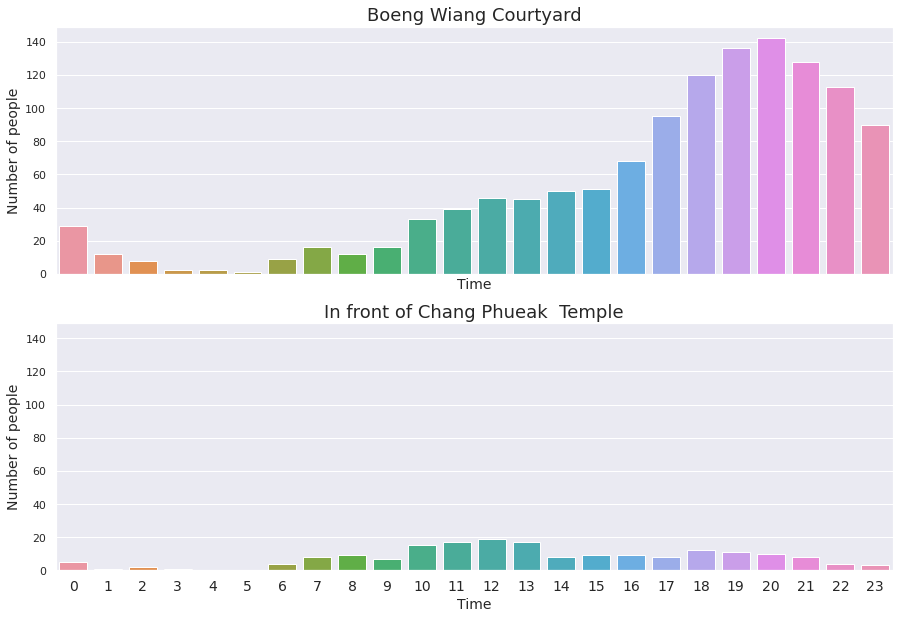

In [84]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15, 10))
site_list = df_by_hour_pivot.columns
ax0 = sns.barplot(x=df_by_hour_pivot.index, y=df_by_hour_pivot[site_list[0]],data=df_by_hour_pivot,ax=ax[0])
ax[0].set_title(site_list[0],fontsize=18)
ax[0].set_ylabel('Number of people',fontsize=14)
ax[0].set_xlabel('Time',fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90,fontsize=14)
ax1 = sns.barplot(x=df_by_hour_pivot.index, y=df_by_hour_pivot[site_list[1]],data=df_by_hour_pivot,ax=ax[1])
ax[1].set_title(site_list[1],fontsize=18)
ax[1].set_ylabel('Number of people',fontsize=14)
ax[1].set_xlabel('Time',fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0,fontsize=14);

# Minutes scale

In [85]:
df_for_minute = df_hour_scale
df_for_minute

,timestamp,deviceid,siteid,sitename,latitude,longitude,month_date,hrs
0,2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,17.959004,102.590499,2022-07-01,0
1,2022-07-01 00:00:03,2,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0
2,2022-07-01 00:00:03,3,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0
3,2022-07-01 00:00:03,4,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0
4,2022-07-01 00:00:03,5,4,In front of Klang Temple,17.959126,102.584171,2022-07-01,0
...,...,...,...,...,...,...,...,...
32794197,2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30,23
32794198,2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30,23
32794199,2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30,23
32794200,2023-06-30 23:59:04,16346,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30,23


In [86]:
df_for_minute['minute']=df_for_minute.timestamp.dt.minute
df_for_minute

,timestamp,deviceid,siteid,sitename,latitude,longitude,month_date,hrs,minute
0,2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,17.959004,102.590499,2022-07-01,0,0
1,2022-07-01 00:00:03,2,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0,0
2,2022-07-01 00:00:03,3,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0,0
3,2022-07-01 00:00:03,4,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0,0
4,2022-07-01 00:00:03,5,4,In front of Klang Temple,17.959126,102.584171,2022-07-01,0,0
...,...,...,...,...,...,...,...,...,...
32794197,2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30,23,59
32794198,2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30,23,59
32794199,2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30,23,59
32794200,2023-06-30 23:59:04,16346,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30,23,59


In [87]:
df_for_minute.dtypes

timestamp     datetime64[ns]
deviceid               int64
siteid                 int64
sitename              object
latitude             float64
longitude            float64
month_date    datetime64[ns]
hrs                    int64
minute                 int64
dtype: object

In [88]:
df_for_minute.set_index('timestamp',inplace=True)
df_for_minute

,deviceid,siteid,sitename,latitude,longitude,month_date,hrs,minute
timestamp,,,,,,,,
2022-07-01 00:00:03,1,7,In front of Had Pathum Temple,17.959004,102.590499,2022-07-01,0,0
2022-07-01 00:00:03,2,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0,0
2022-07-01 00:00:03,3,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0,0
2022-07-01 00:00:03,4,9,In front of Fresh Market,17.956875,102.585087,2022-07-01,0,0
2022-07-01 00:00:03,5,4,In front of Klang Temple,17.959126,102.584171,2022-07-01,0,0
...,...,...,...,...,...,...,...,...
2023-06-30 23:59:03,15031,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30,23,59
2023-06-30 23:59:03,2933,5,Sri Chiang Mai Community Health Park,17.958903,102.587340,2023-06-30,23,59
2023-06-30 23:59:04,3950,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-06-30,23,59


In [89]:
df_by_minute=df_for_minute.loc['2023-04-14']
df_by_minute

,deviceid,siteid,sitename,latitude,longitude,month_date,hrs,minute
timestamp,,,,,,,,
2023-04-14 00:00:03,3701,3,In front of Chang Phueak Temple,17.959747,102.578958,2023-04-14,0,0
2023-04-14 00:00:03,3407,3,In front of Chang Phueak Temple,17.959747,102.578958,2023-04-14,0,0
2023-04-14 00:00:03,398,3,In front of Chang Phueak Temple,17.959747,102.578958,2023-04-14,0,0
2023-04-14 00:00:03,4087,3,In front of Chang Phueak Temple,17.959747,102.578958,2023-04-14,0,0
2023-04-14 00:00:03,3406,3,In front of Chang Phueak Temple,17.959747,102.578958,2023-04-14,0,0
...,...,...,...,...,...,...,...,...
2023-04-14 23:59:12,910,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-04-14,23,59
2023-04-14 23:59:12,13549,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-04-14,23,59
2023-04-14 23:59:12,13593,8,Boeng Wiang Courtyard,17.958664,102.590896,2023-04-14,23,59


In [90]:
df_by_minute_pivot = pd.pivot_table(df_by_minute,values='deviceid',index=['hrs','minute'],columns='sitename',aggfunc='count').fillna(0)
df_by_minute_pivot

sitename    Boeng Wiang Courtyard  In front of Chang Phueak  Temple  \
hrs minute                                                            
0   0                        28.0                               5.0   
    1                        26.0                               5.0   
    2                        25.0                               5.0   
    3                        25.0                               5.0   
    4                        24.0                               5.0   
...                           ...                               ...   
23  55                       59.0                               1.0   
    56                       59.0                               1.0   
    57                       60.0                               1.0   
    58                       60.0                               1.0   
    59                       60.0                               2.0   

sitename    In front of Fresh Market  In front of Had Pathum Temple  \
hrs minute                                                            
0   0                           17.0                           15.0   
    1                           17.0                           14.0   
    2                           16.0                           14.0   
    3                           16.0                           14.0   
    4                           16.0                           14.0   
...                              ...                            ...   
23  55                          15.0                           35.0   
    56                          15.0                           36.0   
    57                          15.0                           38.0   
    58                          15.0                           38.0   
    59                          15.0                           38.0   

sitename    In front of Klang Temple  Naga Courtyard  Soi-16  Soi-19  \
hrs minute                                                             
0   0                           10.0            15.0     9.0     3.0   
    1                           10.0            15.0     9.0     3.0   
    2                           10.0            14.0     8.0     3.0   
    3                            9.0            14.0     8.0     3.0   
    4                            9.0            14.0     8.0     2.0   
...                              ...             ...     ...     ...   
23  55                          14.0            19.0     7.0     1.0   
    56                          14.0            20.0     7.0     0.0   
    57                          16.0            19.0     7.0     0.0   
    58                          18.0            19.0     8.0     0.0   
    59                          18.0            20.0     8.0     0.0   

sitename    Sri Chiang Mai Community Health Park  
hrs minute                                        
0   0                                       20.0  
    1                                       20.0  
    2                                       19.0  
    3                                       19.0  
    4                                       17.0  
...                                          ...  
23  55                                      19.0  
    56                                      19.0  
    57                                      22.0  
    58                                      22.0  
    59                                      22.0  

[1440 rows x 9 columns]

In [91]:
df_by_minute_pivot.loc[(17,30):(17,59)]

sitename    Boeng Wiang Courtyard  In front of Chang Phueak  Temple  \
hrs minute                                                            
17  30                       64.0                               6.0   
    31                       65.0                               6.0   
    32                       64.0                               7.0   
    33                       64.0                               7.0   
    34                       65.0                               7.0   
    35                       65.0                               7.0   
    36                       66.0                               7.0   
    37                       68.0                               7.0   
    38                       68.0                               7.0   
    39                       69.0                               7.0   
    40                       71.0                               7.0   
    41                       71.0                               7.0   
    42                       71.0                               7.0   
    43                       73.0                               7.0   
    44                       73.0                               7.0   
    45                       72.0                               7.0   
    46                       74.0                               7.0   
    47                       75.0                               7.0   
    48                       75.0                               7.0   
    49                       76.0                               7.0   
    50                       76.0                               7.0   
    51                       78.0                               7.0   
    52                       77.0                               7.0   
    53                       77.0                               7.0   
    54                       77.0                               7.0   
    55                       77.0                               7.0   
    56                       78.0                               7.0   
    57                       78.0                               7.0   
    58                       80.0                               7.0   
    59                       80.0                               7.0   

sitename    In front of Fresh Market  In front of Had Pathum Temple  \
hrs minute                                                            
17  30                          40.0                           47.0   
    31                          41.0                           46.0   
    32                          42.0                           47.0   
    33                          43.0                           48.0   
    34                          44.0                           48.0   
    35                          44.0                           49.0   
    36                          43.0                           49.0   
    37                          43.0                           50.0   
    38                          43.0                           50.0   
    39                          42.0                           50.0   
    40                          42.0                           52.0   
    41                          42.0                           53.0   
    42                          42.0                           55.0   
    43                          43.0                           55.0   
    44                          42.0                           56.0   
    45                          41.0                           54.0   
    46                          42.0                           54.0   
    47                          43.0                           54.0   
    48                          42.0                           54.0   
    49                          43.0                           55.0   
    50                          42.0                           56.0   
    51                          42.0                           56.0   
    52                 

In [92]:
df_by_minute_pivot.loc[(17,30):(17,59)].columns

Index(['Boeng Wiang Courtyard', 'In front of Chang Phueak  Temple',
       'In front of Fresh Market', 'In front of Had Pathum Temple',
       'In front of Klang Temple', 'Naga Courtyard', 'Soi-16', 'Soi-19',
       'Sri Chiang Mai Community Health Park'],
      dtype='object', name='sitename')

In [93]:
minutes_g = df_by_minute_pivot.loc[(17,30):(17,59)]
minutes_g.reset_index(inplace=True)
minutes_g

sitename,hrs,minute,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park
0,17,30,64.0,6.0,40.0,47.0,21.0,31.0,14.0,4.0,27.0
1,17,31,65.0,6.0,41.0,46.0,21.0,31.0,14.0,4.0,27.0
2,17,32,64.0,7.0,42.0,47.0,23.0,32.0,14.0,5.0,26.0
3,17,33,64.0,7.0,43.0,48.0,23.0,34.0,14.0,6.0,27.0
4,17,34,65.0,7.0,44.0,48.0,23.0,35.0,14.0,6.0,28.0
5,17,35,65.0,7.0,44.0,49.0,23.0,34.0,14.0,6.0,29.0
6,17,36,66.0,7.0,43.0,49.0,23.0,35.0,15.0,6.0,28.0
7,17,37,68.0,7.0,43.0,50.0,23.0,34.0,15.0,6.0,28.0
8,17,38,68.0,7.0,43.0,50.0,23.0,33.0,15.0,6.0,28.0
9,17,39,69.0,7.0,42.0,50.0,22.0,33.0,16.0,6.0,28.0


In [94]:
minutes_g['minute'] = minutes_g['minute'].astype(str).map(lambda x: '0' + str(x) if len(str(x)) == 1 else str(x))
minutes_g['hrs'] = minutes_g['hrs'].astype(str)
minutes_g.head()

/tmp/ipykernel_593/1525079411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_g['minute'] = minutes_g['minute'].astype(str).map(lambda x: '0' + str(x) if len(str(x)) == 1 else str(x))
/tmp/ipykernel_593/1525079411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_g['hrs'] = minutes_g['hrs'].astype(str)


sitename,hrs,minute,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park
0,17,30,64.0,6.0,40.0,47.0,21.0,31.0,14.0,4.0,27.0
1,17,31,65.0,6.0,41.0,46.0,21.0,31.0,14.0,4.0,27.0
2,17,32,64.0,7.0,42.0,47.0,23.0,32.0,14.0,5.0,26.0
3,17,33,64.0,7.0,43.0,48.0,23.0,34.0,14.0,6.0,27.0
4,17,34,65.0,7.0,44.0,48.0,23.0,35.0,14.0,6.0,28.0


In [95]:
minutes_g['hrsminute']=minutes_g['hrs']+':'+minutes_g['minute']
minutes_g.head()

/tmp/ipykernel_593/2308796815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_g['hrsminute']=minutes_g['hrs']+':'+minutes_g['minute']


sitename,hrs,minute,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,hrsminute
0,17,30,64.0,6.0,40.0,47.0,21.0,31.0,14.0,4.0,27.0,17:30
1,17,31,65.0,6.0,41.0,46.0,21.0,31.0,14.0,4.0,27.0,17:31
2,17,32,64.0,7.0,42.0,47.0,23.0,32.0,14.0,5.0,26.0,17:32
3,17,33,64.0,7.0,43.0,48.0,23.0,34.0,14.0,6.0,27.0,17:33
4,17,34,65.0,7.0,44.0,48.0,23.0,35.0,14.0,6.0,28.0,17:34


In [96]:
minutes_g.set_index('hrsminute',inplace=True)
minutes_g.head()

sitename,hrs,minute,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park
hrsminute,,,,,,,,,,,
17:30,17,30,64.0,6.0,40.0,47.0,21.0,31.0,14.0,4.0,27.0
17:31,17,31,65.0,6.0,41.0,46.0,21.0,31.0,14.0,4.0,27.0
17:32,17,32,64.0,7.0,42.0,47.0,23.0,32.0,14.0,5.0,26.0
17:33,17,33,64.0,7.0,43.0,48.0,23.0,34.0,14.0,6.0,27.0
17:34,17,34,65.0,7.0,44.0,48.0,23.0,35.0,14.0,6.0,28.0


In [97]:
minutes_g.index

Index(['17:30', '17:31', '17:32', '17:33', '17:34', '17:35', '17:36', '17:37',
       '17:38', '17:39', '17:40', '17:41', '17:42', '17:43', '17:44', '17:45',
       '17:46', '17:47', '17:48', '17:49', '17:50', '17:51', '17:52', '17:53',
       '17:54', '17:55', '17:56', '17:57', '17:58', '17:59'],
      dtype='object', name='hrsminute')

In [98]:
minutes_g.columns

Index(['hrs', 'minute', 'Boeng Wiang Courtyard',
       'In front of Chang Phueak  Temple', 'In front of Fresh Market',
       'In front of Had Pathum Temple', 'In front of Klang Temple',
       'Naga Courtyard', 'Soi-16', 'Soi-19',
       'Sri Chiang Mai Community Health Park'],
      dtype='object', name='sitename')

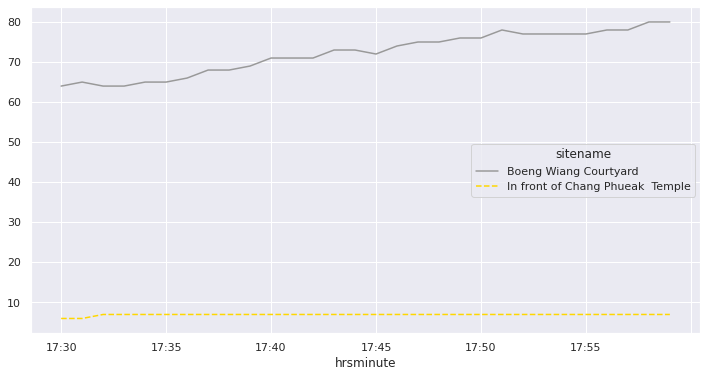

In [99]:
site_list = minutes_g.columns
site_list[2:4]
minutes_g[site_list[2:4]].plot(kind='line', color=['.6', 'gold', 'c'],style = ['-', '--'],figsize=(12, 6));

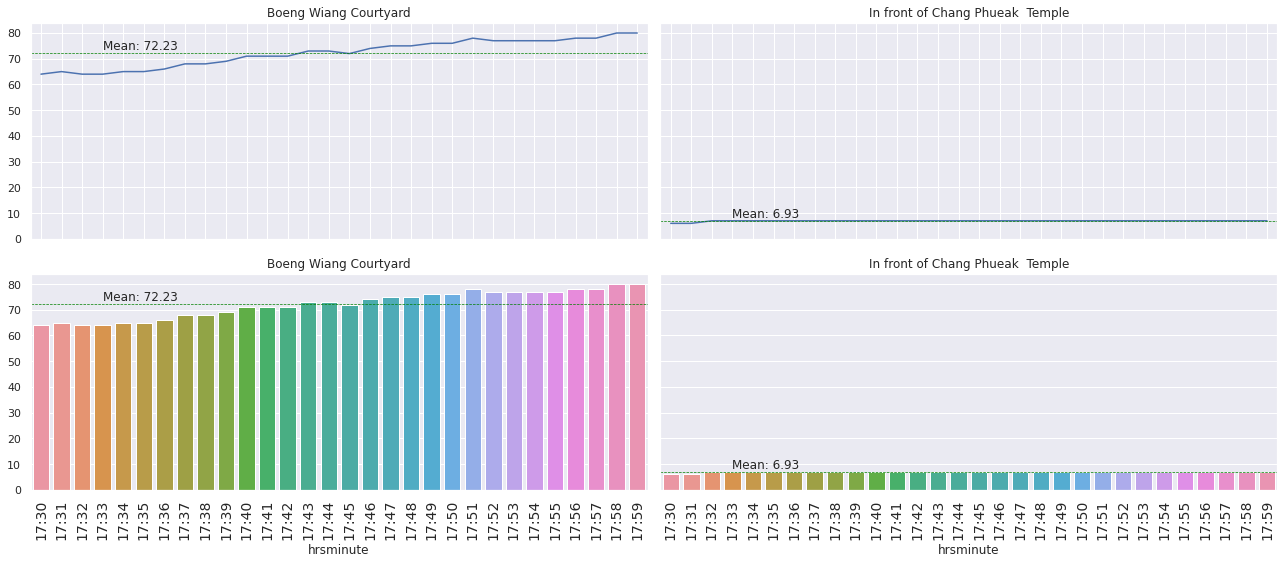

In [100]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(18, 8))
site_list = minutes_g.columns
ax0 = sns.lineplot(x=minutes_g.index, y=minutes_g[site_list[2]],data=minutes_g,ax=ax[0,0])
ax0.axhline(minutes_g[minutes_g.columns[2]].mean(),color='green', linestyle="--", linewidth=.7)
ax[0,0].set_title(site_list[2])
ax[0,0].set_ylabel('')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90,fontsize=14)
ax[0,0].text(3.0, minutes_g[minutes_g.columns[2]].mean(), f'Mean: {minutes_g[minutes_g.columns[2]].mean():.2f}', ha='left', va='bottom')
ax1 = sns.barplot(x=minutes_g.index, y=minutes_g[site_list[2]],data=minutes_g,ax=ax[1,0])
ax1.axhline(minutes_g[minutes_g.columns[2]].mean(),color='green', linestyle="--", linewidth=.7)
ax[1,0].set_title(site_list[2])
ax[1,0].set_ylabel('')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90,fontsize=14)
ax[1,0].text(3.0, minutes_g[minutes_g.columns[2]].mean(), f'Mean: {minutes_g[minutes_g.columns[2]].mean():.2f}', ha='left', va='bottom')
ax2 = sns.lineplot(x=minutes_g.index, y=minutes_g[site_list[3]],data=minutes_g,ax=ax[0,1])
ax2.axhline(minutes_g[minutes_g.columns[3]].mean(),color='green', linestyle="--", linewidth=.7)
ax[0,1].set_title(site_list[3])
ax[0,1].set_ylabel('')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90,fontsize=14)
ax[0,1].text(3.0, minutes_g[minutes_g.columns[3]].mean(), f'Mean: {minutes_g[minutes_g.columns[3]].mean():.2f}', ha='left', va='bottom')
ax3 = sns.barplot(x=minutes_g.index, y=minutes_g[site_list[3]],data=minutes_g,ax=ax[1,1])
ax3.axhline(minutes_g[minutes_g.columns[3]].mean(),color='green', linestyle="--", linewidth=.7)
ax[1,1].set_title(site_list[3])
ax[1,1].set_ylabel('')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90,fontsize=14)
ax[1,1].text(3.0, minutes_g[minutes_g.columns[3]].mean(), f'Mean: {minutes_g[minutes_g.columns[3]].mean():.2f}', ha='left', va='bottom')
plt.tight_layout();

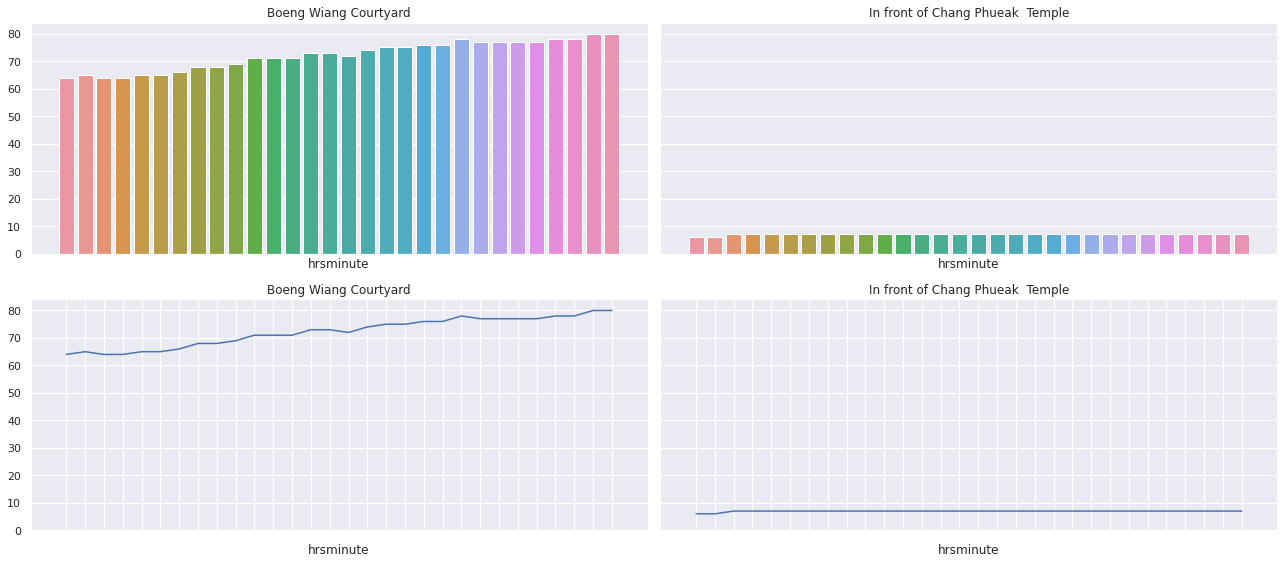

In [101]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(18, 8))
site_list = minutes_g.columns

ax0 = sns.barplot(x=minutes_g.index, y=minutes_g[site_list[2]],data=minutes_g,ax=ax[0,0])
ax[0,0].set_title(site_list[2])
ax[0,0].set_ylabel('')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

ax1 = sns.lineplot(x=minutes_g.index, y=minutes_g[site_list[2]],data=minutes_g,ax=ax[1,0])
ax[1,0].set_title(site_list[2])
ax[1,0].set_ylabel('')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

ax2 = sns.barplot(x=minutes_g.index, y=minutes_g[site_list[3]],data=minutes_g,ax=ax[0,1])
ax[0,1].set_title(site_list[3])
ax[0,1].set_ylabel('')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

ax3 = sns.lineplot(x=minutes_g.index, y=minutes_g[site_list[3]],data=minutes_g,ax=ax[1,1])
ax[1,1].set_title(site_list[3])
ax[1,1].set_ylabel('')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)
plt.tight_layout();

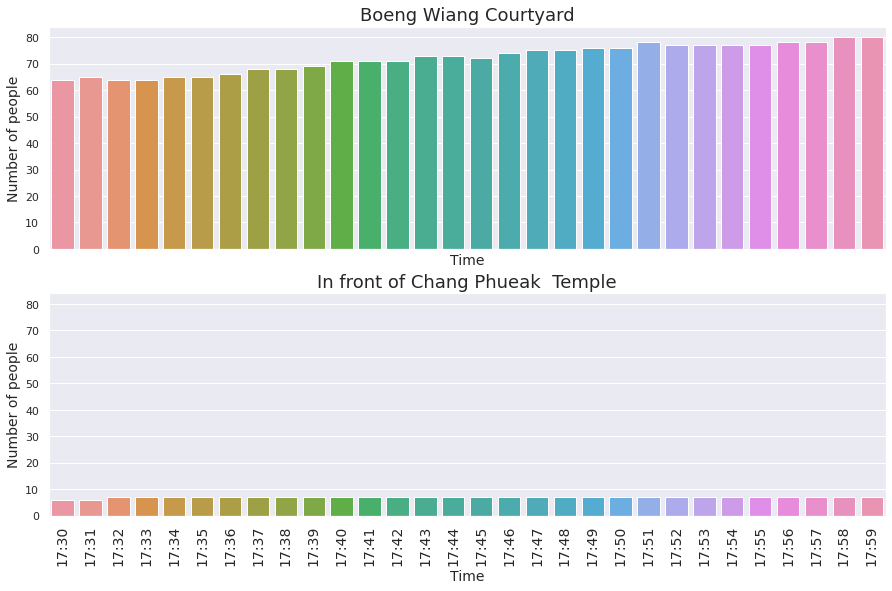

In [102]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15, 9))
site_list = minutes_g.columns

ax0 = sns.barplot(x=minutes_g.index, y=minutes_g[site_list[2]],data=minutes_g,ax=ax[0])
ax[0].set_title(site_list[2],fontsize=18)
ax[0].set_xlabel('Time',fontsize=14)
ax[0].set_ylabel('Number of people',fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90,fontsize=14);
ax[0].set_xticks(range(0, len(minutes_g.index), 5))

ax1 = sns.barplot(x=minutes_g.index, y=minutes_g[site_list[3]],data=minutes_g,ax=ax[1])
ax[1].set_title(site_list[3],fontsize=18)
ax[1].set_xlabel('Time',fontsize=14)
ax[1].set_ylabel('Number of people',fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,fontsize=14);

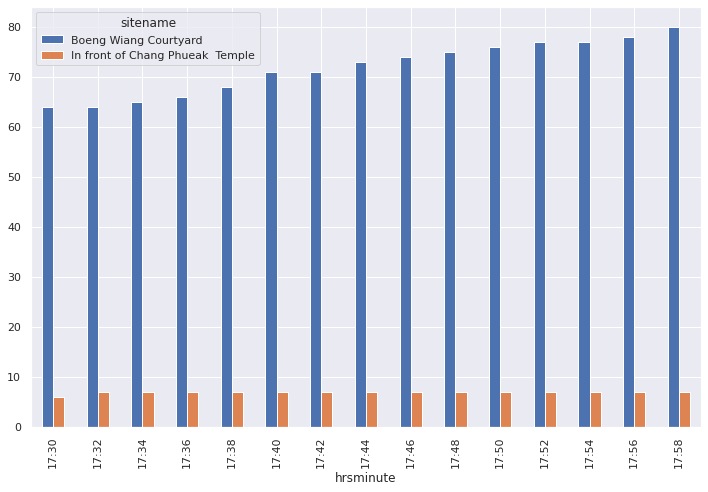

In [103]:
minutes_g[minutes_g.columns[2:4]][::2].plot(kind='bar',figsize=(10, 7))
plt.tight_layout();